## ___Проект удержания сотрудников «Работа с заботой»___

<span style="font-size: 20px; font-family: Georgia;">**🎯 Цели исслдеования**</span>

- Первичная цель - **оценить удовлетворённость сотрудников, предупреждать увольнения**


- Дополнительные цели - *извлечь полезную информацию о сотрудниках*

<span style="font-size: 20px; font-family: Georgia;">**📊 Методология**</span>

Проанализируем данные компании за прошлый перод, получим модель, прогнозирующую удовлетворённость работников и их увольнения. Выделим несколько кластеров сотрудников и подберём стратегии удержания для каждого. 

<span style="font-size: 18px; font-family: Georgia;">Этап 1: Анализ данных</span>

- Исследовательский анализ исторических данных

- Определение значимых метрик и KPI

<span style="font-size: 18px; font-family: Georgia;">Этап 2: Моделирование</span>

- Модели прогнозирования удовлетворённости и вероятности увольнения

- Кластерный анализ для сегментации сотрудников

- Валидация моделей на тестовых данных

<span style="font-size: 18px; font-family: Georgia;">Этап 3: Рекомендации</span>

- Разработка стратегий удержания для каждого сегмента

<span style="font-size: 20px; font-family: Georgia;">📈 **Визуализация результатов**</span>

Сделаем общие глобальные выводы, предоставим *графическое подтверждение* сделанным выводам. 



In [1]:
# !pip uninstall -y numpy matplotlib scikit-learn pandas scipy -q

In [2]:
# !pip install shap -q

In [3]:
# !pip install phik -q

In [4]:
# !pip install numpy==1.21.6 \
#             pandas==1.5.3 \
#             scipy==1.7.3 \
#             scikit-learn==1.0.2 \
#             matplotlib==3.5.3 -q

In [5]:
!pip uninstall -y numpy scipy pandas matplotlib seaborn shap scikit-learn phik -q

In [6]:
!pip install numpy==1.21.6 \
    pandas==1.3.3 \
    scipy==1.7.3 \
    scikit-learn==1.0.2 \
    matplotlib==3.4.3 \
    seaborn==0.11.2 -q

In [7]:
!pip install phik==0.12.0
!pip install shap==0.39.0

  Using cached phik-0.12.0-cp39-cp39-manylinux2010_x86_64.whl (676 kB)
  Using cached shap-0.39.0.tar.gz (356 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-hatxuvtr/shap_3a61c14361fe402f96af122909fb3114/setup.py'"'"'; __file__='"'"'/tmp/pip-install-hatxuvtr/shap_3a61c14361fe402f96af122909fb3114/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-r3u6qjgr
       cwd: /tmp/pip-install-hatxuvtr/shap_3a61c14361fe402f96af122909fb3114/
  Complete output (118 lines):
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to

In [8]:
!pip install imbalanced-learn==0.8.0 -q

In [9]:
!pip install shap -q

In [10]:
!pip install imblearn -q

In [11]:
from scipy import stats as st
import numpy as np
import pandas as pd
import datetime as dt
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.notebook_repr_html', False)
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, OrdinalEncoder, 
    MinMaxScaler, RobustScaler
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
)

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, 
    VotingRegressor, StackingRegressor
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans

from scipy.stats import shapiro

from sklearn.base import clone

from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import StratifiedKFold
import shap

from sklearn.inspection import partial_dependence
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
import scipy.sparse
import seaborn as sns
import phik
from sklearn.model_selection import cross_val_score

## Загрузка данных

In [12]:
file_path = '/datasets/train_job_satisfaction_rate.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    train = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")

train_copy = train
train.head(5)


       id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20  

In [13]:
file_path = '/datasets/test_features.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    X_test = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")

X_test.head(5)

       id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800  

In [14]:
file_path = '/datasets/test_target_job_satisfaction_rate.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    y_test = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")
    

y_test.head(5)

       id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

## Предобработка

In [15]:
x_test_ids = X_test['id'].tolist()

test = X_test.merge(y_test, on='id')

y_test = test.set_index('id').loc[x_test_ids, ['job_satisfaction_rate']].reset_index()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Заметим отсутствующие значения в dept и level.

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Видим небольшое количество пропусков, которые будут обработаны в пайплайне. Все типы соответствуют столбцам

In [18]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [19]:
train.apply(lambda x: x.unique())

id                       [155278, 653870, 184592, 171431, 693419, 40544...
dept                     [sales, hr, technology, purchasing, marketing,...
level                                        [junior, middle, sinior, nan]
workload                                               [medium, high, low]
employment_years                           [2, 1, 4, 7, 9, 6, 3, 10, 8, 5]
last_year_promo                                                  [no, yes]
last_year_violations                                             [no, yes]
supervisor_evaluation                                      [1, 5, 2, 3, 4]
salary                   [24000, 38400, 12000, 18000, 22800, 30000, 564...
job_satisfaction_rate    [0.58, 0.76, 0.11, 0.37, 0.2, 0.78, 0.56, 0.44...
dtype: object

In [20]:
train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [21]:
train['salary'].unique()

array([24000, 38400, 12000, 18000, 22800, 30000, 56400, 52800, 13200,
       54000, 19200, 40800, 34800, 27600, 26400, 33600, 50400, 15600,
       14400, 25200, 72000, 31200, 32400, 48000, 43200, 46800, 58800,
       84000, 44400, 39600, 37200, 21600, 28800, 62400, 60000, 42000,
       49200, 55200, 57600, 68400, 45600, 51600, 64800, 80400, 20400,
       61200, 76800, 69600, 16800, 36000, 63600, 81600, 66000, 74400,
       67200, 70800, 73200, 75600, 79200, 94800, 78000, 88800, 92400,
       85200, 91200, 98400, 96000, 97200])

In [22]:
X_test.apply(lambda x: x.unique())

id                       [485046, 686555, 467458, 418655, 789145, 42997...
dept                     [marketing, hr, sales, purchasing, technology,...
level                                        [junior, middle, sinior, nan]
workload                                            [medium, low, high,  ]
employment_years                           [2, 1, 5, 6, 3, 9, 7, 4, 8, 10]
last_year_promo                                                  [no, yes]
last_year_violations                                             [no, yes]
supervisor_evaluation                                      [5, 4, 3, 1, 2]
salary                   [28800, 30000, 19200, 40800, 42000, 26400, 492...
dtype: object

In [23]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [24]:
X_test['dept'] = X_test['dept'].replace(' ', np.nan)
X_test['workload'] = X_test['workload'].replace(' ', np.nan)
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

In [25]:
for data in [train, X_test]:
    obj_columns = data.select_dtypes(include=['object']).columns
    data[obj_columns] = data[obj_columns].apply(lambda x: x.str.lower().str.replace(' ', '_', regex=False))


In [26]:
train.describe()

                  id  employment_years  supervisor_evaluation        salary  \
count    4000.000000       4000.000000            4000.000000   4000.000000   
mean   544957.621000          3.718500               3.476500  33926.700000   
std    257883.104622          2.542513               1.008812  14900.703838   
min    100954.000000          1.000000               1.000000  12000.000000   
25%    322836.750000          2.000000               3.000000  22800.000000   
50%    534082.500000          3.000000               4.000000  30000.000000   
75%    771446.000000          6.000000               4.000000  43200.000000   
max    999521.000000         10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max                 1.000000  

In [27]:
X_test.describe()

                  id  employment_years  supervisor_evaluation        salary
count    2000.000000       2000.000000            2000.000000   2000.000000
mean   552765.213500          3.666500               3.526500  34066.800000
std    253851.326129          2.537222               0.996892  15398.436729
min    100298.000000          1.000000               1.000000  12000.000000
25%    339052.000000          1.000000               3.000000  22800.000000
50%    550793.000000          3.000000               4.000000  30000.000000
75%    765763.750000          6.000000               4.000000  43200.000000
max    999029.000000         10.000000               5.000000  96000.000000

Данные нормальные, без аномалий

In [28]:
train['id'].duplicated().sum()

0

<a id="boxplot_func"></a>

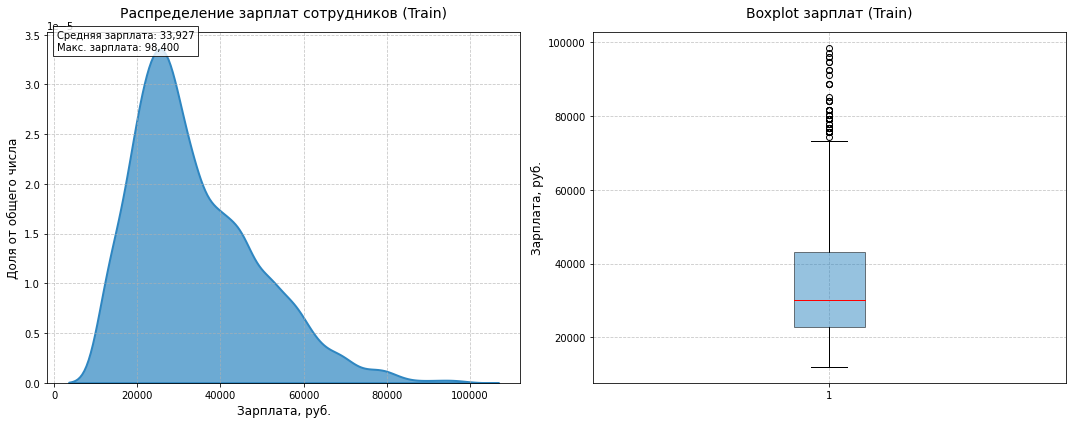

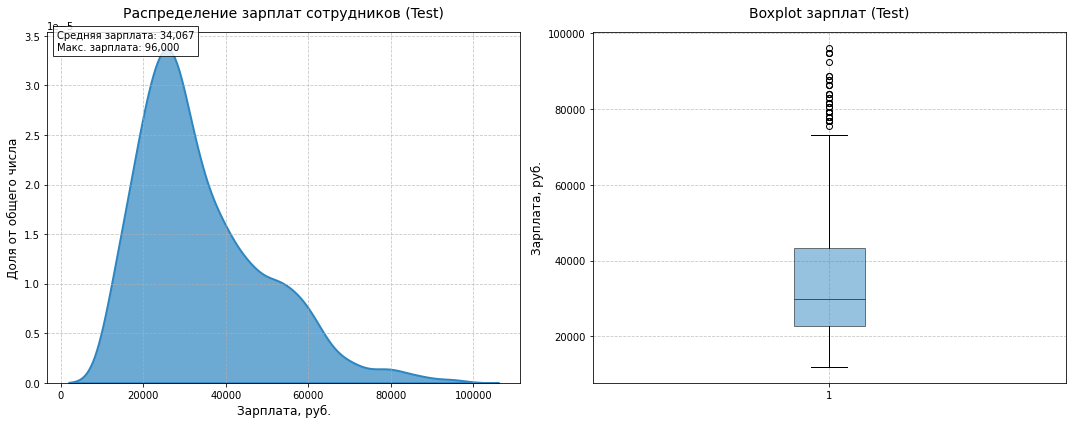

In [29]:
def boxplot_func(train, test):
    for df, dataset_name in zip([train, test], ['Train', 'Test']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        sns.kdeplot(data=df, x='salary', fill=True, common_norm=False,
                    ax=ax1, color="#2E86C1", alpha=0.7, linewidth=2)
        ax1.set_title(f'Распределение зарплат сотрудников ({dataset_name})', fontsize=14, pad=15)
        ax1.set_xlabel('Зарплата, руб.', fontsize=12)
        ax1.set_ylabel('Доля от общего числа', fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.7)
        ax1.text(0.02, 0.95, 
                 f'Средняя зарплата: {df["salary"].mean():,.0f}\nМакс. зарплата: {df["salary"].max():,.0f}',
                 transform=ax1.transAxes,
                 bbox=dict(facecolor='white', alpha=0.8))

        ax2.boxplot(df['salary'], 
                    patch_artist=True,
                    boxprops=dict(facecolor='#2E86C1', alpha=0.5),
                    medianprops=dict(color='red'))
        ax2.set_title(f'Boxplot зарплат ({dataset_name})', fontsize=14, pad=15)
        ax2.set_ylabel('Зарплата, руб.', fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

boxplot_func(train, test)


In [30]:
train.duplicated(subset=train.columns.drop('id')).sum()

245

In [31]:
X_test['id'].duplicated().sum()

0

In [32]:
X_test.duplicated(subset=X_test.columns.drop('id')).sum()

557


Видим большое количество почти полных(за исключением id) дубликатов.
Мы можем решить, что эти дубликаты правдоподобны и оставить в датасете большой кусок повторяющейся информации,
или можем решить, что это аномалия и удалить из датасета до четверти строк.
## Без удаления дубликатов

In [33]:
test = X_test.merge(y_test, on='id')
y_test = y_test.drop(columns=['id'])

In [34]:
if isinstance(y_test, pd.DataFrame):
    if y_test.shape[1] == 1:
        y_test = y_test.iloc[:, 0]
    else:
        column_name = y_test.columns[0]
        y_test = y_test[column_name]

### Исследовательский анализ данных

<a id="histogramm_func"></a>

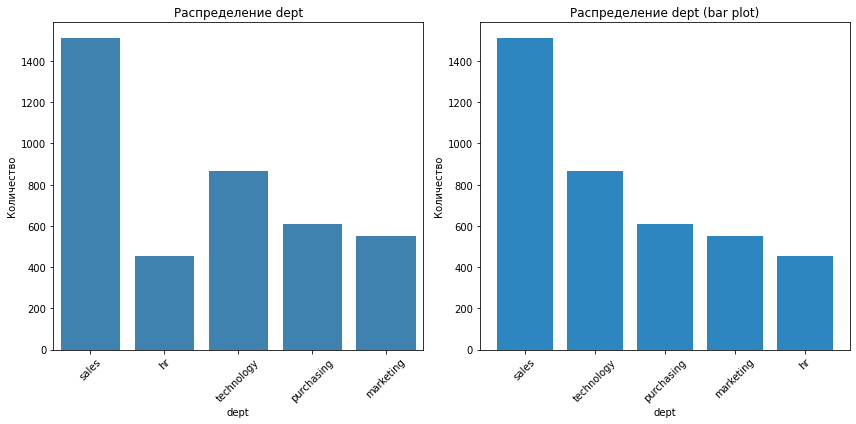

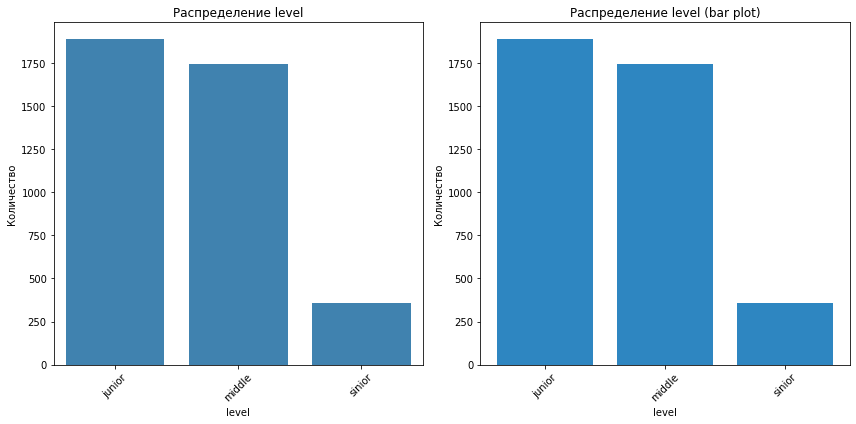

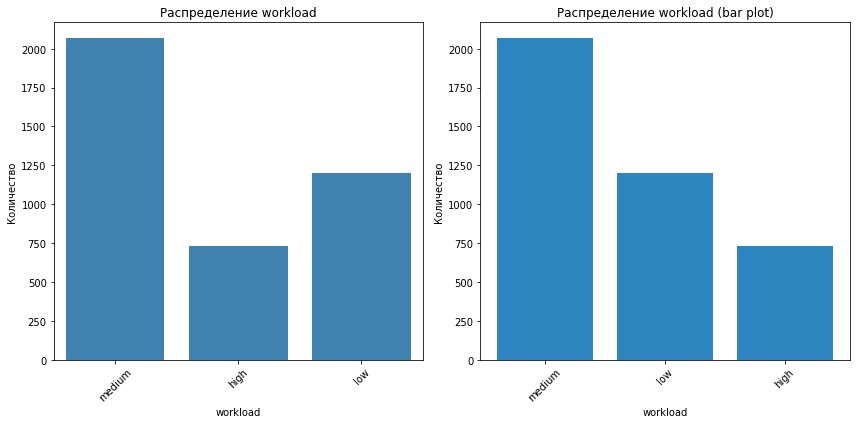

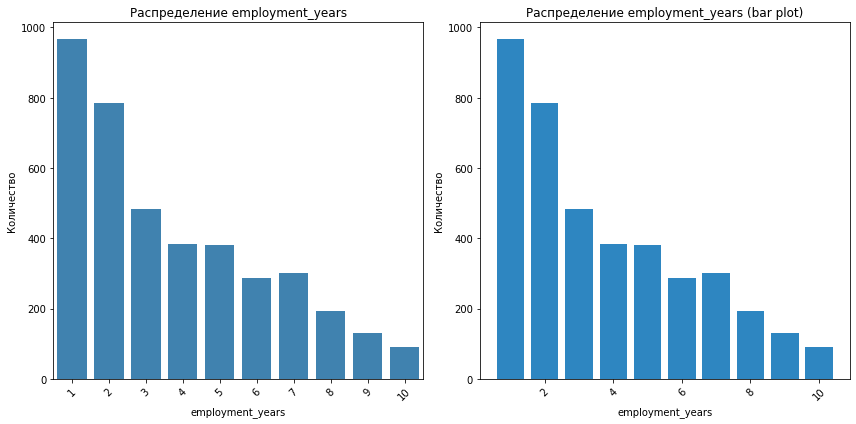

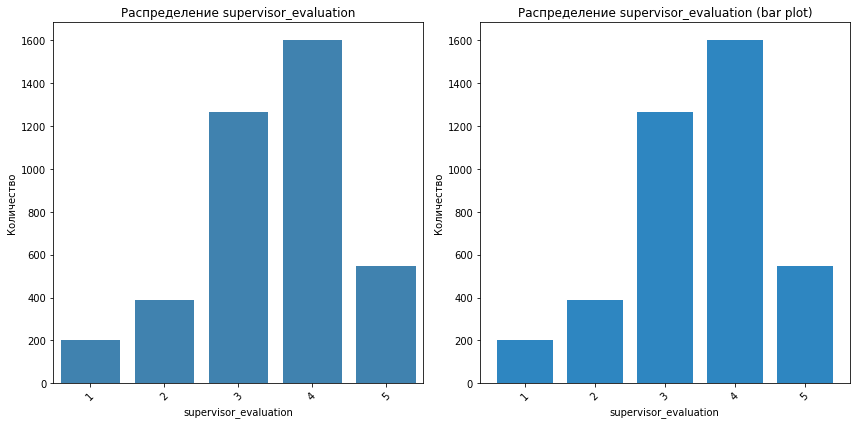

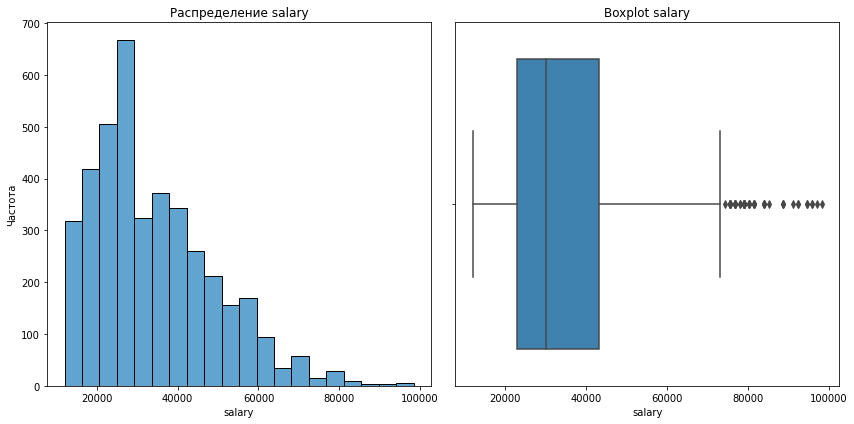

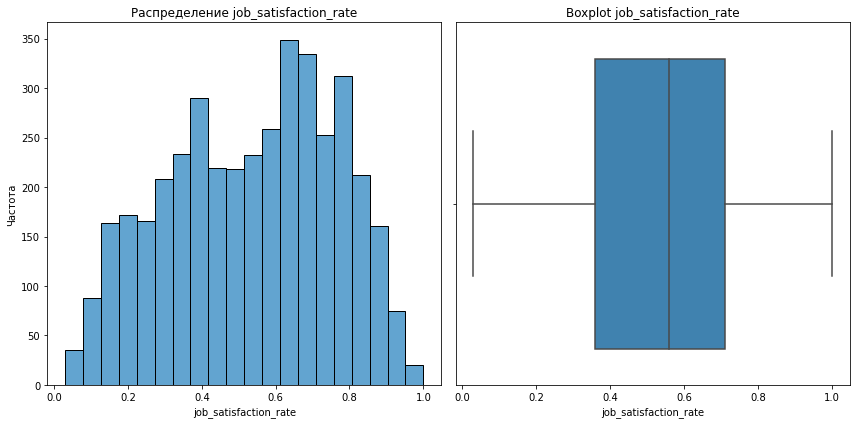

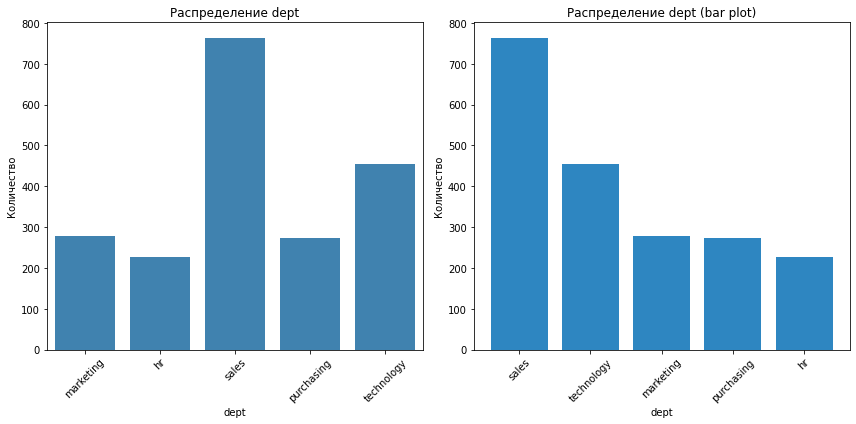

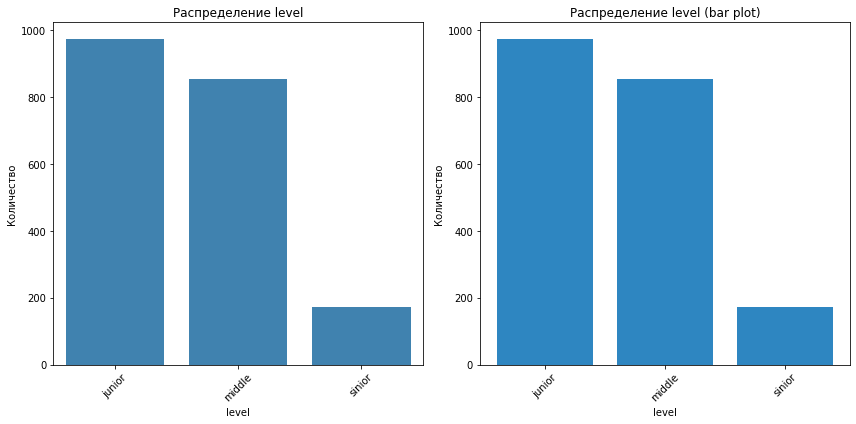

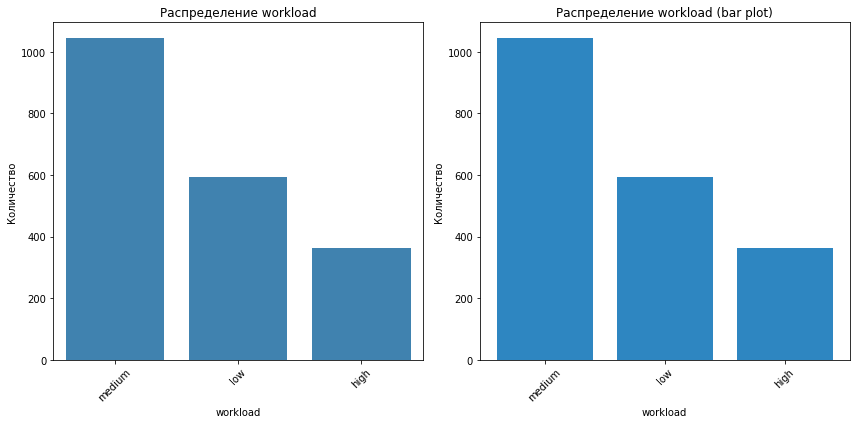

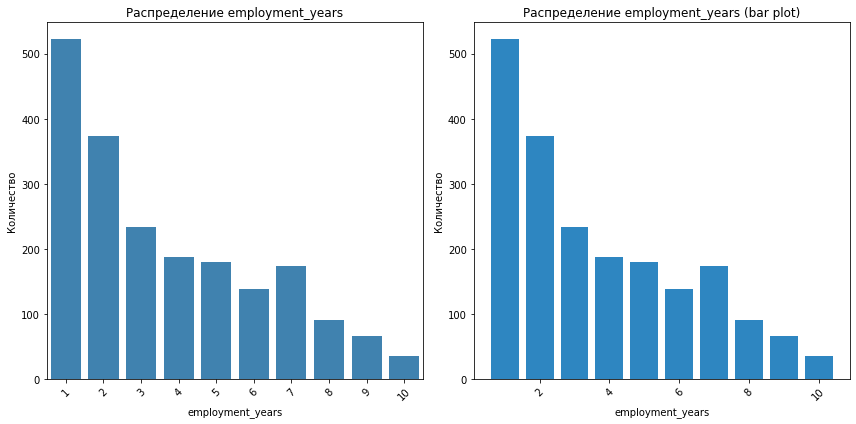

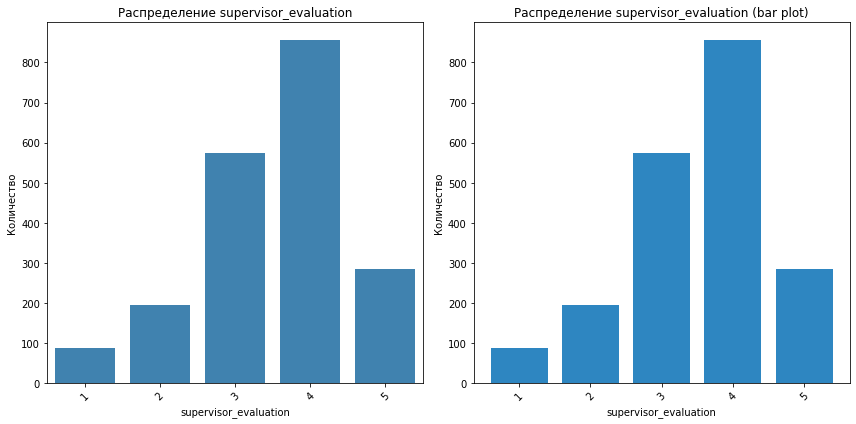

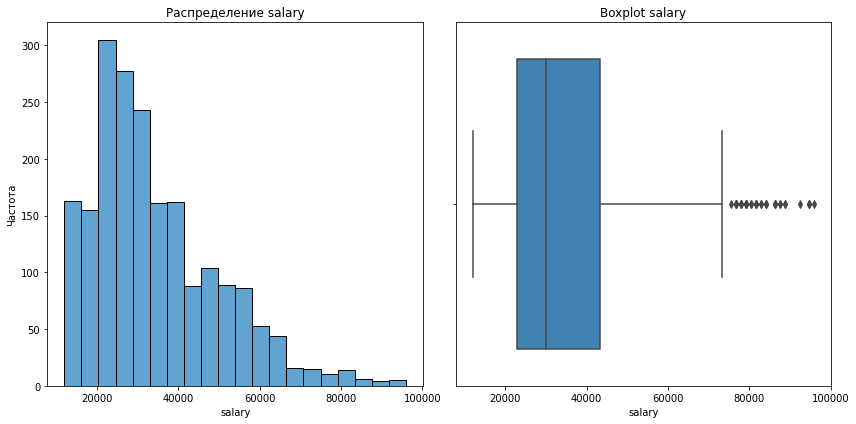

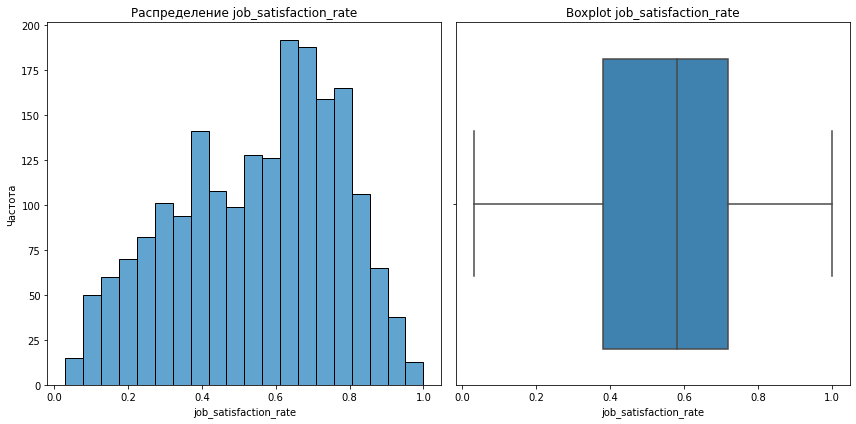

In [35]:
subset = ['dept', 'level', 'workload', 'employment_years',
               'supervisor_evaluation',
               'salary', 'job_satisfaction_rate']
def histogramm_func(train, test, subset):
    for df in [train, test]:
        for column in subset:

            plt.figure(figsize=(12, 6))

            unique_values = df[column].nunique()


            if unique_values < 20:  
                plt.subplot(1, 2, 1)
                sns.countplot(data=df, x=column, color='#2E86C1')
                plt.title(f'Распределение {column}')
                plt.xlabel(column)
                plt.ylabel('Количество')
                plt.xticks(rotation=45)

                plt.subplot(1, 2, 2)
                counts = df[column].value_counts()
                plt.bar(counts.index, counts.values, color='#2E86C1')
                plt.title(f'Распределение {column} (bar plot)')
                plt.xlabel(column)
                plt.ylabel('Количество')
                plt.xticks(rotation=45)

            else: 
                plt.subplot(1, 2, 1)
                sns.histplot(df[column], bins=20, color='#2E86C1')
                plt.title(f'Распределение {column}')
                plt.xlabel(column)
                plt.ylabel('Частота')

                plt.subplot(1, 2, 2)
                sns.boxplot(x=df[column], color='#2E86C1')
                plt.title(f'Boxplot {column}')
                plt.xlabel(column)

            plt.tight_layout()
            plt.show()
histogramm_func(train, test, subset)

<span style="font-size: 16px; font-family: Georgia;">**Сделаем выводы о числовых и мультиклассовых данных**</span>

- Большинство сотрудников работают в продажах и технологиях, остальные в закупках, маркетинге и hr.
- Джунов и мидлов много, сеньёров сильно меньше.
- Сотрудников не нагруженных немного больше чем сильно нагруженных и меньше чем средне нагруженных.
- Стаж работы не подчиняется никакому явному распределению.
- Чаще всего сотрудники получают оценки 3 и 4.
- Зарплаты распределены Пуассоноски со средним в 34000.
- Удовлетворённость работой выглядит нормально с средним 0,54
- Данные распределены примерно одинаково в тренировочной и тестовой выборках.

<a id="diogramm_func"></a>

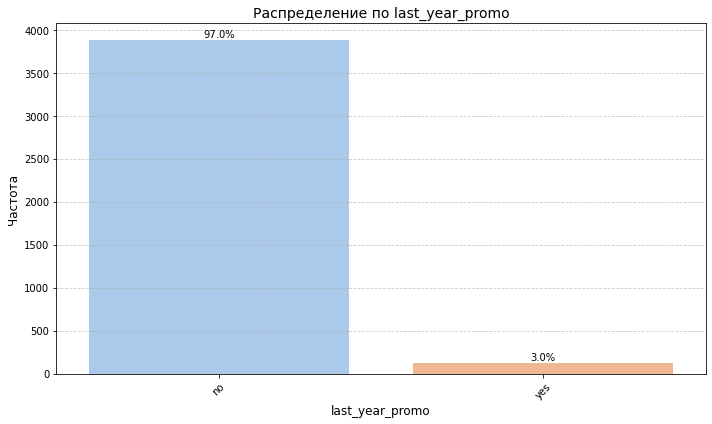

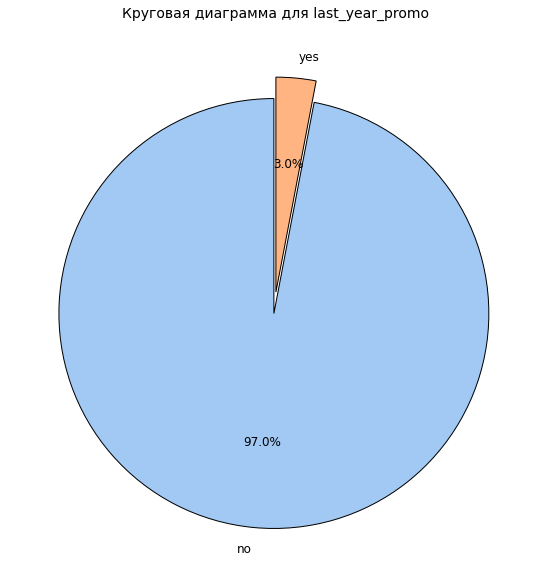

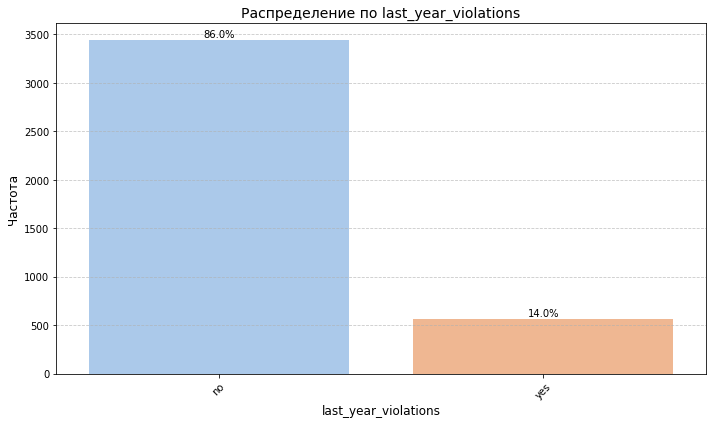

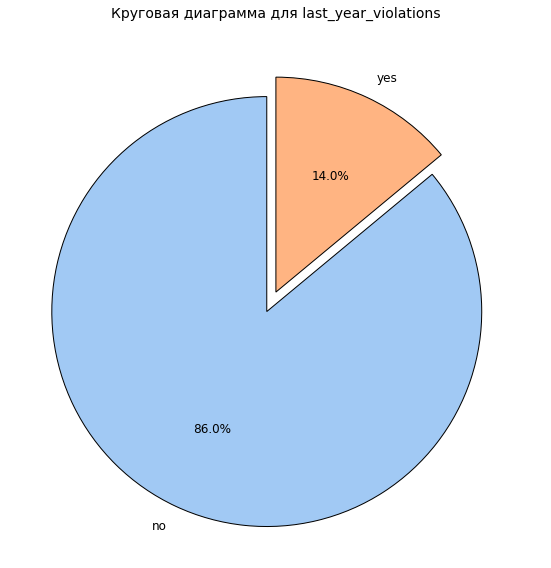

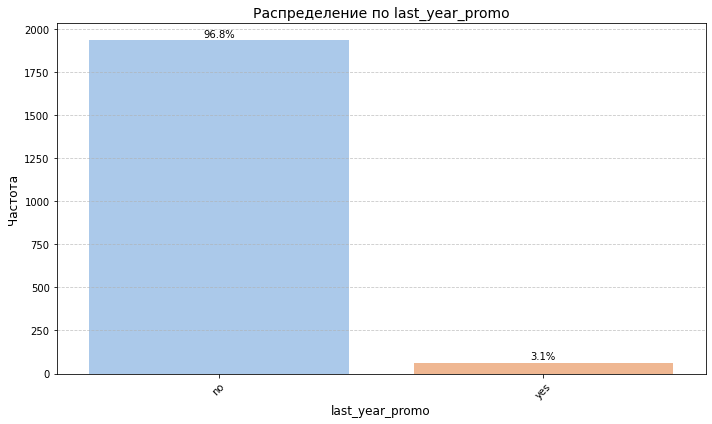

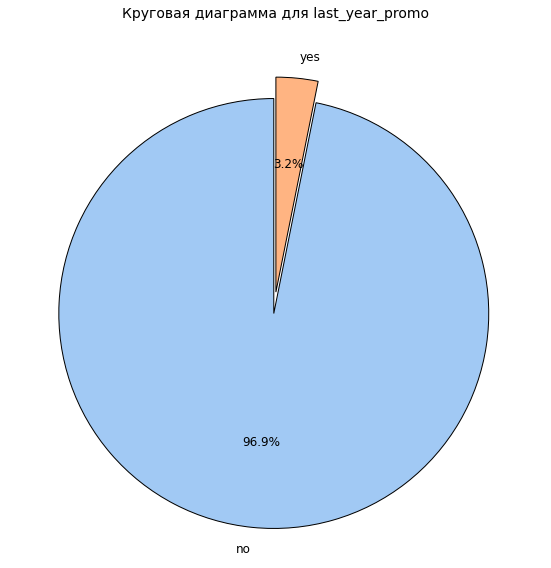

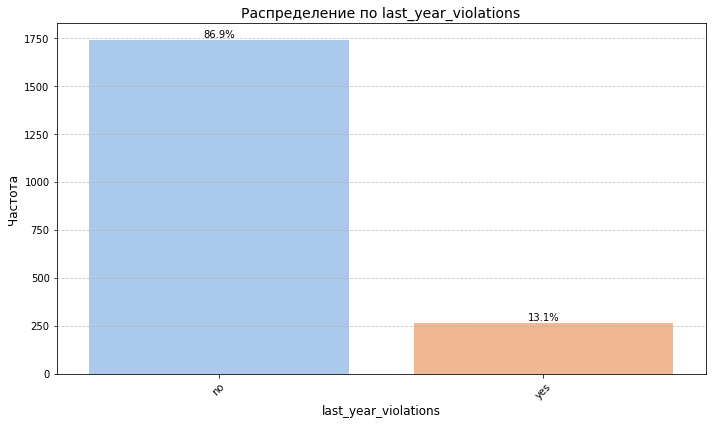

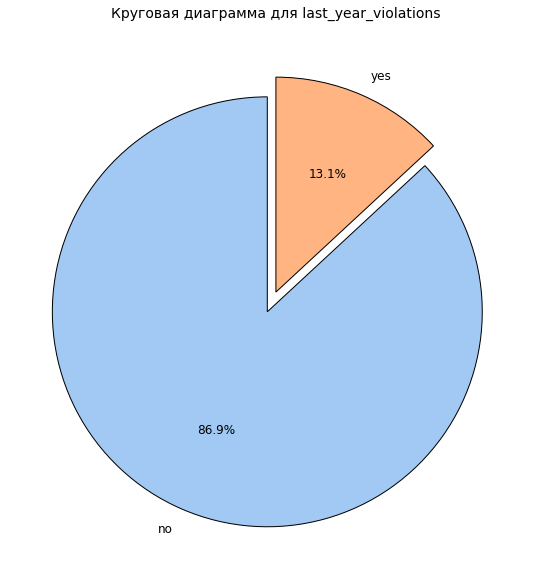

In [36]:
subset = ['last_year_promo', 'last_year_violations']
def diogramm_func(train, test, subset):
    for df in [train, test]:
        for column in subset:
            plt.figure(figsize=(10, 6))
            sns.countplot(
                x=column, 
                data=df, 
                order=df[column].value_counts().index, 
                palette='pastel'
            )

            total = len(df[column])
            for p in plt.gca().patches:
                percentage = f'{100 * p.get_height() / total:.1f}%'
                plt.gca().annotate(percentage, 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 6), 
                                   textcoords='offset points')

            plt.title(f'Распределение по {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Частота', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(8, 8))
            explode = [0.1 if i == 0 else 0 for i in range(len(df[column].value_counts()))]  
            df[column].value_counts().plot.pie(
                autopct='%1.1f%%', 
                startangle=90,  
                colors=sns.color_palette('pastel'), 
                wedgeprops={'edgecolor': 'black'}, 
                explode=explode,
                textprops={'fontsize': 12}
            )
            plt.title(f'Круговая диаграмма для {column}', fontsize=14)
            plt.ylabel('')  
            plt.tight_layout()
            plt.show()
diogramm_func(train, test, subset)

#### Корреляционный анализ

<span style="font-size: 16px; font-family: Georgia;">**Сделаем выводы о бинарных категоривальных данных**</span>

- Почти никто не получал повышение за последний год
- Небольшое число сотрудников(каждый 7ой) совершали нарушения за последний год
- Данные примерно одинаковые в тренировочной и тестовой выборках

<a id="corr_func"></a>

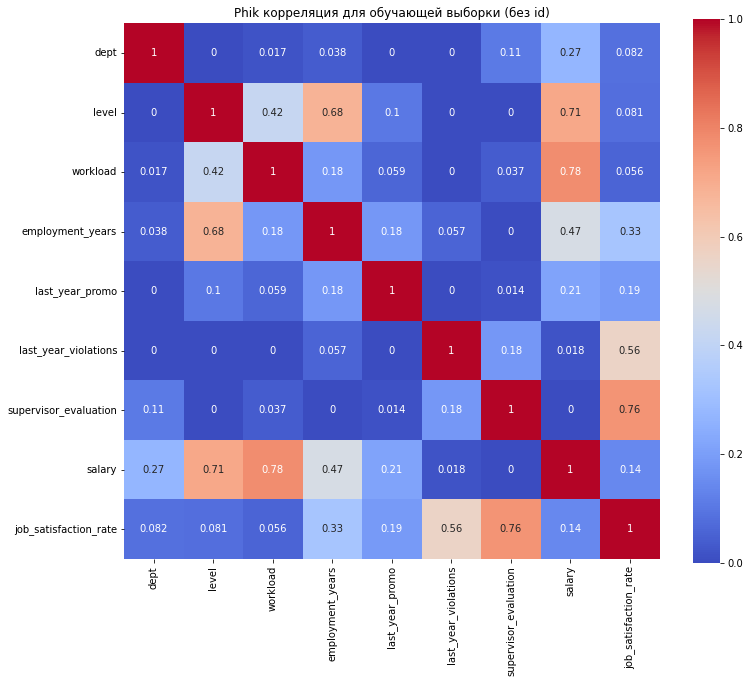

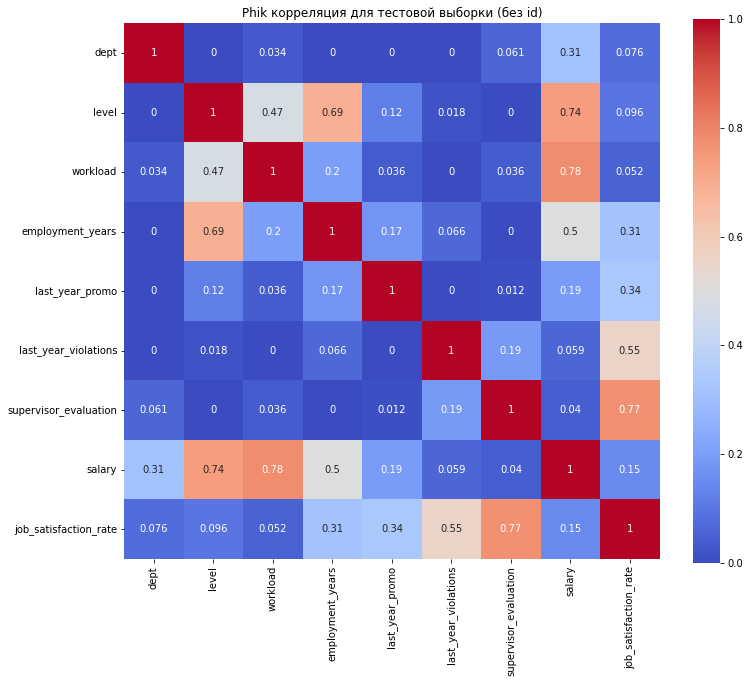

In [37]:
cols_to_use = [col for col in train.columns if col != 'id']

phik_matrix_train = train[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])
phik_matrix_test = test[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_train, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для обучающей выборки (без id)")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_test, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для тестовой выборки (без id)")
plt.show()


#### _____Выводы о данных_____


Видим <span style="font-size: 14px; font-family: Georgia;">**сильную корреляцию**</span> между Зарплатой и:
- Уровнем должности
- Загруженностью
- Стажем 

Также <span style="font-size: 14px; font-family: Georgia;">**сильная связь**</span> между:
- Уровнем должности и Стажем
- Оценкой работы сотрудника и Удовлетворённостью работой

<span style="font-size: 14px; font-family: Georgia;">**Небольшая связь**</span> между:
- Удовлетворённостью работой и Стажем
- Уценкой работы сотрудника и Зарплатой
- Загруженностью и Уровнем должности
- Загруженностью и Стажем

<span style="font-size: 16px; font-family: Georgia;">**Выводы о данных**</span>

- Почти никто не получал повышение за последний год
- Небольшое число сотрудников(каждый 7ой) совершали нарушения за последний год
- Большинство сотрудников работают в продажах и технологиях, остальные в закупках, маркетинге и hr.
- Джунов и мидлов много, сеньёров сильно меньше.
- Сотрудников не нагруженных немного больше чем сильно нагруженных и меньше чем средне нагруженных.
- Стаж работы не подчиняется никакому явному распределению.
- Чаще всего сотрудники получают оценки 3 и 4.
- Зарплаты распределены Пуассоноски со средним в 34000.
- Удовлетворённость работой выглядит нормально с средним 0,54
- Данные распределены примерно одинаково в тренировочной и тестовой выборках.

<span style="font-size: 16px; font-family: Georgia;">*Мы можем перейти к использованию данных для обучения и проверки моделей, помня про наличие пропусков в данных*</span>

### Пайплайны

Создадим метрику

In [38]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    mask_valid = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true, y_pred = y_true[mask_valid], y_pred[mask_valid]
    
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2  + 1e-10
    
    return 100.0 * np.mean(numerator / denominator)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [39]:
X_train = train.drop(columns=['job_satisfaction_rate', 'id'])
y_train = train['job_satisfaction_rate']

<a id="standardize_categories"></a>

In [40]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']
def standardize_categories(df, cat_columns):
    df_copy = df.copy()
    for col in cat_columns:
        df_copy[col] = df_copy[col].astype(str).str.lower()
        df_copy[col] = df_copy[col].replace(['_', 'unknown', 'na'], 'missing')
    return df_copy


X_train = standardize_categories(X_train, cat_columns)
X_test = standardize_categories(X_test, cat_columns)

In [41]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
target_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


X_train = standardize_categories(X_train, cat_columns)
X_test = standardize_categories(X_test, cat_columns)

for col in X_train.columns:
    if X_train[col].isna().any():
        if col in cat_columns:
            fill_value = X_train[col].mode()[0]
        else:
            fill_value = X_train[col].mean()
        
        X_train[col] = X_train[col].fillna(fill_value)
        X_test[col] = X_test[col].fillna(fill_value)

        
print(f"Тип X_train: {type(X_train)}")


ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

target_pipe = Pipeline([
    ('simpleImputer_target', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('target', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])


preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_columns),
    ('target', target_pipe, target_columns)
], remainder='drop')  

final_p = Pipeline([
    ('preprocessor', preprocessor),
    ('final_imputer', SimpleImputer(strategy='mean')), 
    ('model', LinearRegression())
])

param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [ElasticNet()],
        'model__alpha': [0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [DecisionTreeRegressor(random_state=42)],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'preprocessor__num__scaler': ['passthrough']  
    },
    {
        'model': [RandomForestRegressor(n_jobs=4, random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None],
        'model__min_samples_leaf': [1, 3],
        'preprocessor__num__scaler': ['passthrough']
    },
    {
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5],
        'preprocessor__num__scaler': ['passthrough']
    },
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [5, 7, 9, 11],
        'model__weights': ['uniform', 'distance'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    }
]

print("Начинаем поиск лучшей модели...")
grid = RandomizedSearchCV(
    final_p, 
    param_distributions=param_grid, 
    n_iter=100,
    cv=5, 
    scoring=smape_scorer, 
    n_jobs=-1,
    random_state=42
)

grid.fit(X_train, y_train)

best_single_model = grid.best_estimator_
print(f"Лучшая модель: {best_single_model}")
print(f"Лучший smape в кросс-валидации: {-grid.best_score_:.4f}")

best_model_smape = smape(y_test, best_single_model.predict(X_test))
print(f"Лучшая модель на тестовой выборке smape: {best_model_smape:.4f}")

# top_models = []
# models_added = set()  

# print("\nСоздаем топ-5 моделей для ансамбля...")
# for i in range(min(20, len(grid.cv_results_['params']))):
# #     idx = (-grid.cv_results_['mean_test_score']).argsort()[i]
#     idx = (grid.cv_results_['mean_test_score']).argsort()[::-1][i]

#     score = grid.cv_results_['mean_test_score'][idx]
    
#     if (score < 15) & (score > -15):  
#         params = grid.cv_results_['params'][idx]
#         model_type = f"{type(params['model']).__name__}"
#         if hasattr(params['model'], 'alpha'):
#             model_type += f"_alpha_{params['model'].alpha}"

#         if len(top_models) < 5 and model_type not in models_added:
#             print(f"Добавляем модель {params['model']} с smape: {score:.4f}")

#             model_pipeline = Pipeline([
#                 ('preprocessor', clone(preprocessor)),
#                 ('final_imputer', SimpleImputer(strategy='mean')),  
#                 ('model', clone(params['model']))
#             ])
#             model_pipeline.fit(X_train, y_train)

#             top_models.append((f'model_{i}', model_pipeline))
#             models_added.add(model_type)

# print("\nСоздаем ансамбли моделей...")
# if len(top_models) < 2:
#     print("Недостаточно разнообразных моделей, добавляем дополнительные...")
    
#     elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#     pipeline_en = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('model', elasticnet)
#     ])
#     pipeline_en.fit(X_train, y_train)
#     top_models.append(('elasticnet', pipeline_en))
    
#     gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05)
#     pipeline_gbr = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('model', gbr)
#     ])
#     pipeline_gbr.fit(X_train, y_train)
#     top_models.append(('gbr', pipeline_gbr))

# voting_ensemble = VotingRegressor(estimators=top_models)
# voting_ensemble.fit(X_train, y_train)

# stacking_ensemble = StackingRegressor(
#     estimators=top_models,
#     final_estimator=Ridge(alpha=0.5),
#     cv=5
# )
# stacking_ensemble.fit(X_train, y_train)

# print("\nСоздаем дополнительный ансамбль с заранее подобранными моделями...")
custom_preprocessor = Pipeline([
    ('column_transformer', clone(preprocessor)),
    ('final_imputer', SimpleImputer(strategy='mean'))
])

custom_preprocessor.fit(X_train)
X_train_transformed = custom_preprocessor.transform(X_train)
X_test_transformed = custom_preprocessor.transform(X_test)

# elasticnet = ElasticNet(alpha=0.8, l1_ratio=0.7)
# elasticnet.fit(X_train_transformed, y_train)

# gbr_conservative = GradientBoostingRegressor(learning_rate=0.005, max_depth=2, min_samples_leaf=100)
# gbr_conservative.fit(X_train_transformed, y_train)

# gbr_moderate = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, min_samples_leaf=50)
# gbr_moderate.fit(X_train_transformed, y_train)

# rf = RandomForestRegressor(n_estimators=200, max_depth=10)
# rf.fit(X_train_transformed, y_train)

# custom_ensemble = VotingRegressor([
#     ('elasticnet', elasticnet),
#     ('gbr_conservative', gbr_conservative),
#     ('gbr_moderate', gbr_moderate),
#     ('rf', rf)
# ])
# custom_ensemble.fit(X_train_transformed, y_train)

# print("\nРезультаты оценки всех моделей на тестовой выборке:")
# voting_smape = smape(y_test, voting_ensemble.predict(X_test))
# stacking_smape = smape(y_test, stacking_ensemble.predict(X_test))
# custom_smape = smape(y_test, custom_ensemble.predict(X_test_transformed))

# print(f"Лучшая одиночная модель:       smape = {best_model_smape:.4f}")
# print(f"Ансамбль голосования (Voting):  smape = {voting_smape:.4f}")
# print(f"Ансамбль стекинга (Stacking):   smape = {stacking_smape:.4f}")
# print(f"Кастомный ансамбль моделей:     smape = {custom_smape:.4f}")

# all_models = {
#     "Лучшая одиночная": (best_single_model, best_model_smape),
#     "Voting ансамбль": (voting_ensemble, voting_smape),
#     "Stacking ансамбль": (stacking_ensemble, stacking_smape),
#     "Кастомный ансамбль": (custom_ensemble, custom_smape)
# }

# best_model_name = min(all_models, key=lambda k: all_models[k][1])
# best_model_final, best_smape = all_models[best_model_name]

# print(f"\nНаилучшая модель: {best_model_name} с smape = {best_smape:.4f}")


Тип X_train: <class 'pandas.core.frame.DataFrame'>
Начинаем поиск лучшей модели...
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('num',
                             

#### Важность признаков модели

<a id="feature_importance"></a>

Получено 12 имен признаков


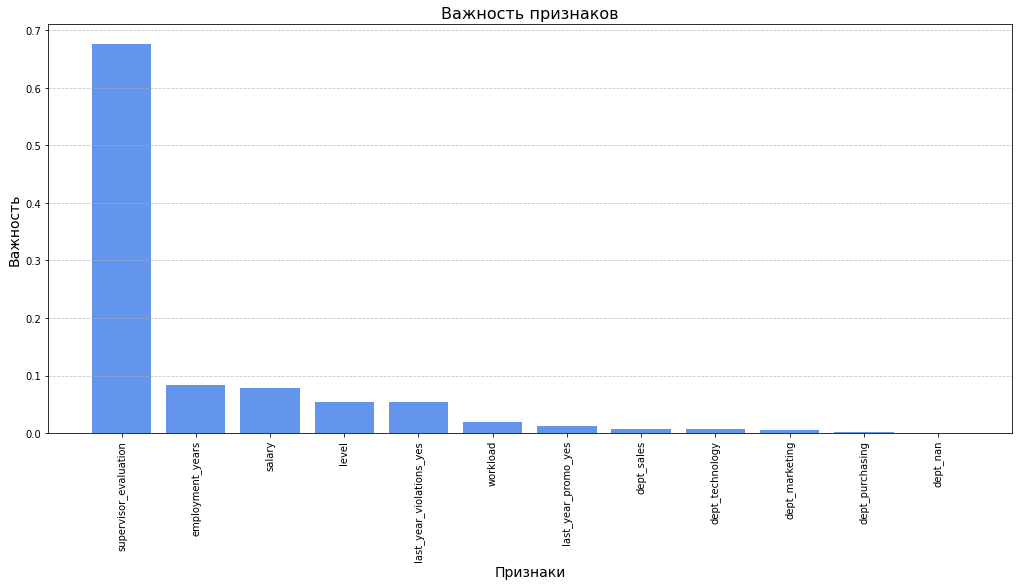


Топ-10 важных признаков:
1. supervisor_evaluation (важность: 0.6766)
2. employment_years (важность: 0.0836)
3. salary (важность: 0.0792)
4. level (важность: 0.0544)
5. last_year_violations_yes (важность: 0.0537)
6. workload (важность: 0.0195)
7. last_year_promo_yes (важность: 0.0119)
8. dept_sales (важность: 0.0074)
9. dept_technology (важность: 0.0072)
10. dept_marketing (важность: 0.0049)


In [42]:
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'named_steps'):
            if 'ohe' in transformer.named_steps:
                encoder = transformer.named_steps['ohe']
                
                # Если колонки заданы как строки
                if all(isinstance(col, str) for col in columns):
                    for i, col in enumerate(columns):
                        if hasattr(encoder, 'drop') and encoder.drop == 'first':
                            # Пропускаем первую категорию, если drop='first'
                            cats = encoder.categories_[i][1:]
                        else:
                            cats = encoder.categories_[i]
                        feature_names.extend([f"{col}_{cat}" for cat in cats])
                else:
                    # Если колонки заданы индексами, используем общие имена
                    for i in range(len(columns)):
                        if hasattr(encoder, 'drop') and encoder.drop == 'first':
                            cats = encoder.categories_[i][1:]
                        else:
                            cats = encoder.categories_[i]
                        feature_names.extend([f"col_{columns[i]}_{cat}" for cat in cats])
            elif 'target' in transformer.named_steps:
                # Для OrdinalEncoder или других энкодеров целевой переменной
                feature_names.extend(columns)
            else:
                # Для других типов Pipeline
                feature_names.extend(columns)
        else:
            # Для простых трансформеров (StandardScaler, MinMaxScaler и т.д.)
            feature_names.extend(columns)
    
    return feature_names

def feature_importance(X_train, X_test, y_train):
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    try:
        feature_names = get_feature_names(preprocessor)
        print(f"Получено {len(feature_names)} имен признаков")

        if len(feature_names) != X_train_transformed.shape[1]:
            print(f"Предупреждение: количество имен признаков ({len(feature_names)}) не совпадает с количеством колонок в трансформированных данных ({X_train_transformed.shape[1]})")
            feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

    except Exception as e:
        print(f"Ошибка при получении имен признаков: {e}")
        feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

    model = GradientBoostingRegressor(
        learning_rate=0.05, 
        max_depth=5, 
        min_samples_leaf=50, 
        n_estimators=200, 
        subsample=0.6,
        random_state=42
    )
    model.fit(X_train_transformed, y_train)

    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(14, 8))
    plt.title('Важность признаков', fontsize=16)
    plt.bar(range(len(indices)), importance[indices], color='cornflowerblue')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.xlabel('Признаки', fontsize=14)
    plt.ylabel('Важность', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\nТоп-10 важных признаков:")
    for i in range(min(10, len(indices))):
        print(f"{i+1}. {feature_names[indices[i]]} (важность: {importance[indices[i]]:.4f})")
feature_importance(X_train, X_test, y_train)

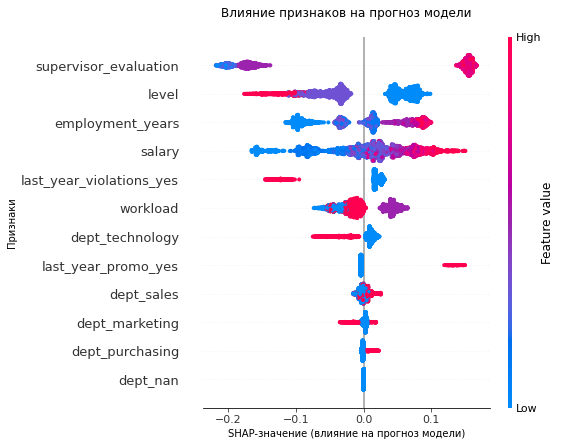

In [43]:
feature_names = get_feature_names(preprocessor)

model = GradientBoostingRegressor(
    learning_rate=0.05, 
    max_depth=5, 
    min_samples_leaf=50, 
    n_estimators=200, 
    subsample=0.6,
    random_state=42
)

model.fit(X_train_transformed, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)


plt.figure(figsize=(10, 8))


shap.summary_plot(
    shap_values, 
    X_train_transformed,
    feature_names=feature_names,
    show=False  
)

plt.title('Влияние признаков на прогноз модели', fontsize=12, pad=20)
plt.xlabel('SHAP-значение (влияние на прогноз модели)', fontsize=10)
plt.ylabel('Признаки', fontsize=10)

plt.tight_layout()

plt.show()

supervisor_evaluation:

- оценка руководства — ключевой фактор. Высокая корреляция (0.75) подчёркивает линейный характер связи: чем выше эта оценка, тем выше удовлетворённость.

employment_years (стаж работы):

- Корреляция не показывает сильной линейной связи (близко к 0). Однако SHAP указывает, что у сотрудников с более длительным стажем низкий риск увольнения.

salary (зарплата):

- Средняя корреляция (0.13) говорит о слабой линейной зависимости. SHAP фактически даёт дополнительную информацию: высокая зарплата снижает вероятность увольнения, а низкая — увеличивает. Это важный, но не ключевой фактор.

level (должностной уровень):

- Корреляция слаба (0.03). SHAP подчёркивает, что последствия роста должностного уровня могут быть нелинейны: у более высоких уровней появляется стресс, а низкие уровни остаются более удовлетворёнными.

workload (нагрузка):

- Корреляция также почти нулевая (0.03), но SHAP выделяет влияние этого признака для высоких и низких нагрузок: большая нагрузка вызывает выгорание, а малая может способствовать увольнению.

dept (отдел): 

- dept_sales: У сотрудников из отдела продаж чаще отмечается повышенная неудовлетворённость, возможно, из-за жёстких требований по выполнению плана.
- dept_marketing: Схожая тенденция. Вероятной причиной может быть высокая конкуренция или неопределённость работы.
- dept_technology и dept_purchasing: Как правило, меньшее влияние или ненапряжённая работа в данных отделах уменьшает вероятность неудовлетворённости.

last_year_promo_yes (наличие повышения за прошлый год)

- Отсутствие повышения (синие точки): Увеличивает неудовлетворённость, так как сотрудники могут чувствовать, что их не оценивают должным образом или их карьерный рост застопорился.
- Наличие повышения (красные точки): Снижает неудовлетворённость, благодаря позитивному воздействию на мотивацию.


## С удалением дубликатов

In [44]:
train.duplicated(subset=train.columns.drop('id')).sum()

245

In [45]:
test.duplicated(subset=X_test.columns.drop('id')).sum()

557

In [46]:
train_clean = train.drop_duplicates(subset=train.columns.drop('id'))
train_clean.duplicated(subset=train_clean.columns.drop('id')).sum()

0

### Исследовательский анализ данных

[Функция histogramm_func](#histogramm_func)

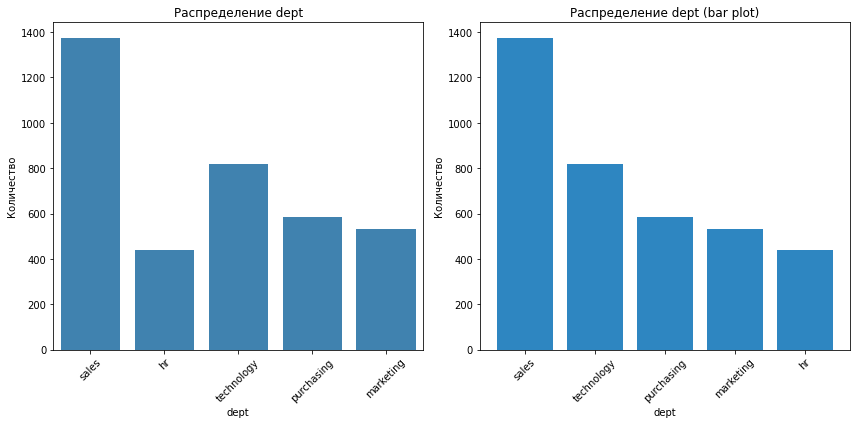

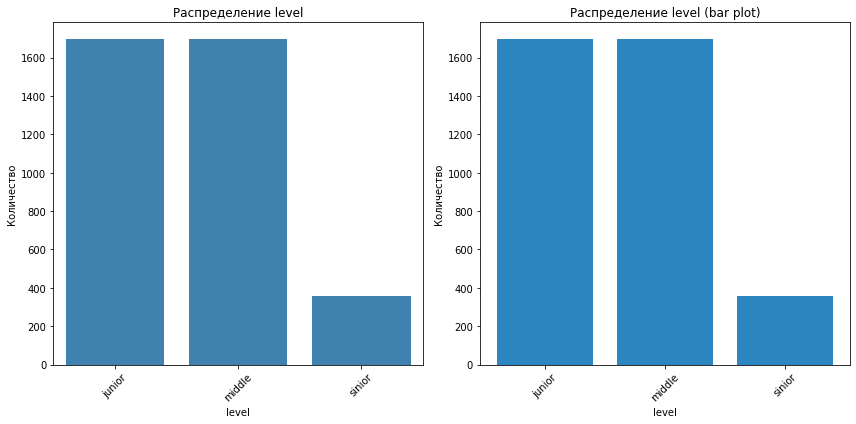

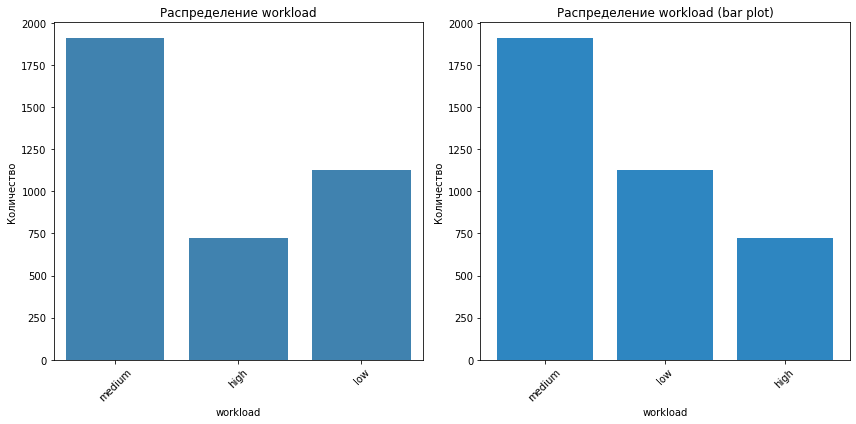

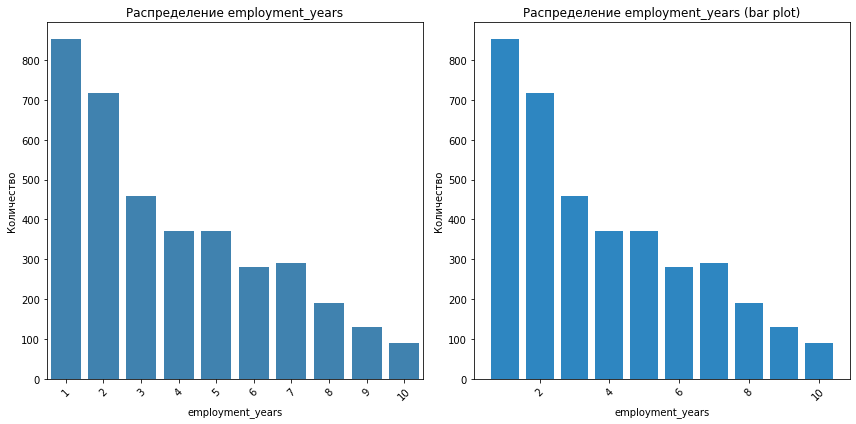

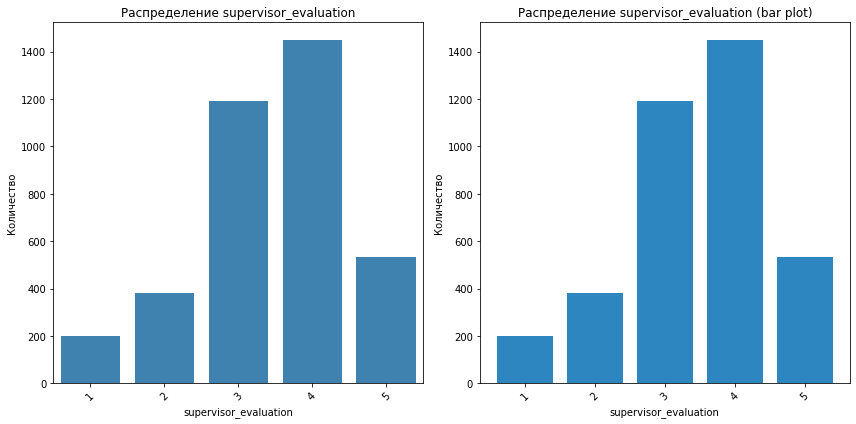

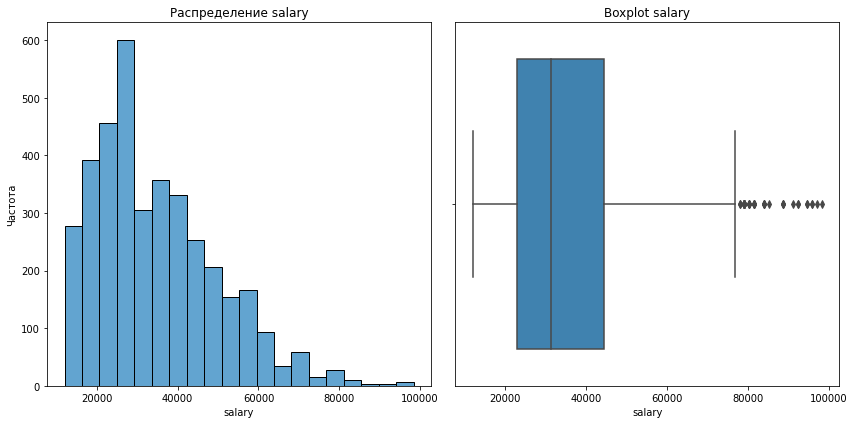

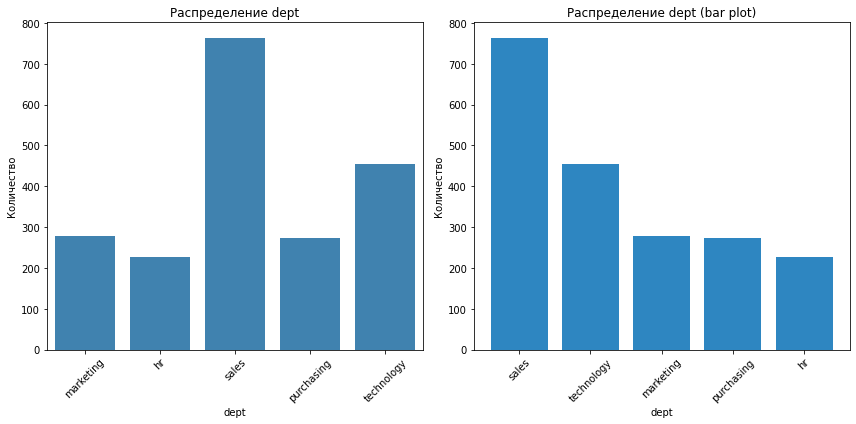

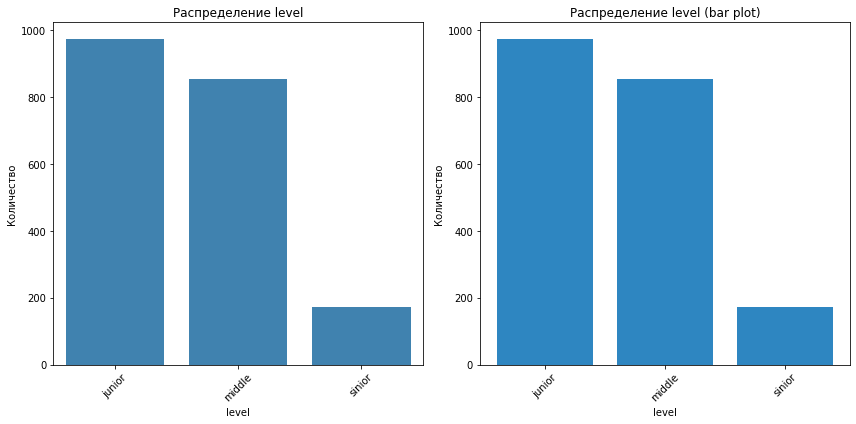

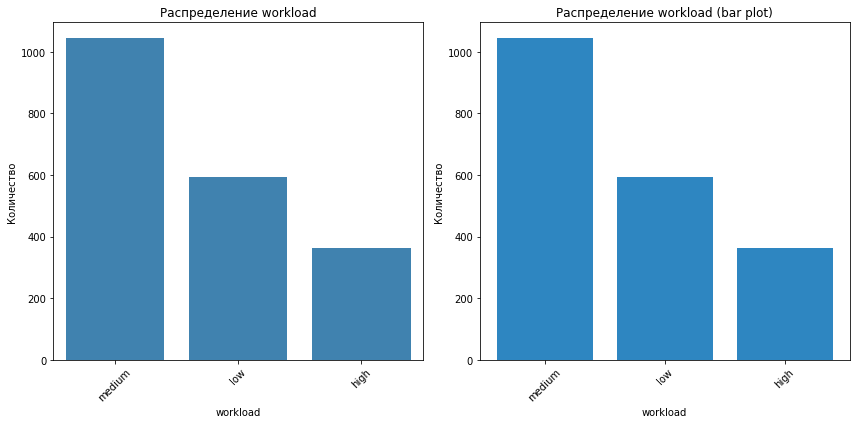

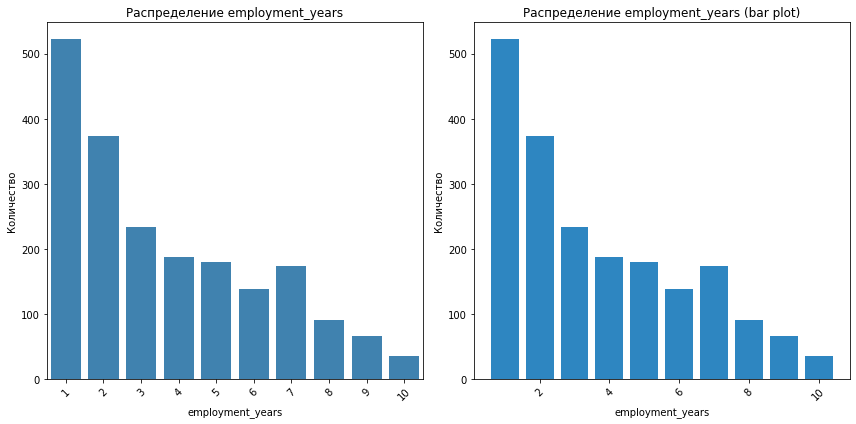

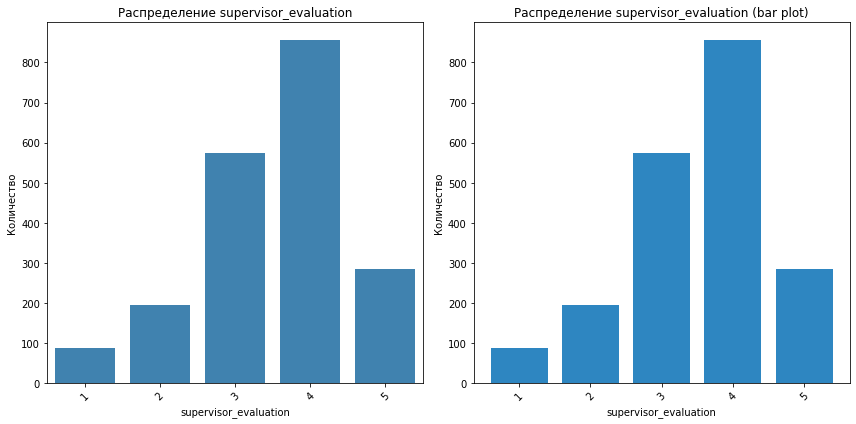

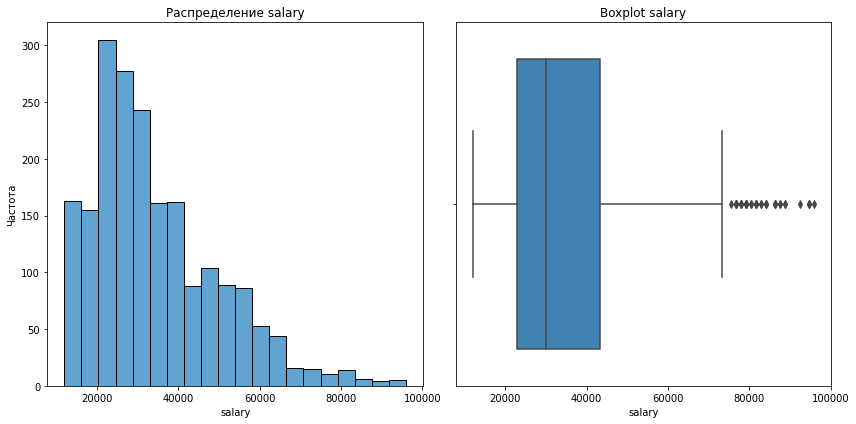

In [47]:
subset = ['dept', 'level', 'workload', 'employment_years',
           'supervisor_evaluation',
           'salary']
histogramm_func(train_clean, test, subset)

[Функция diogramm_func](#diogramm_func)

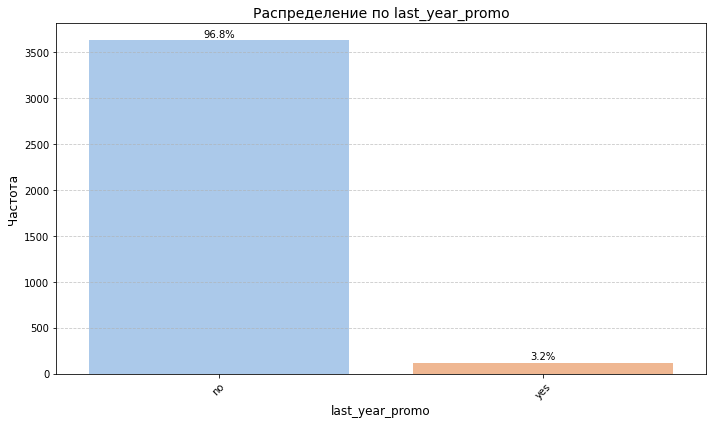

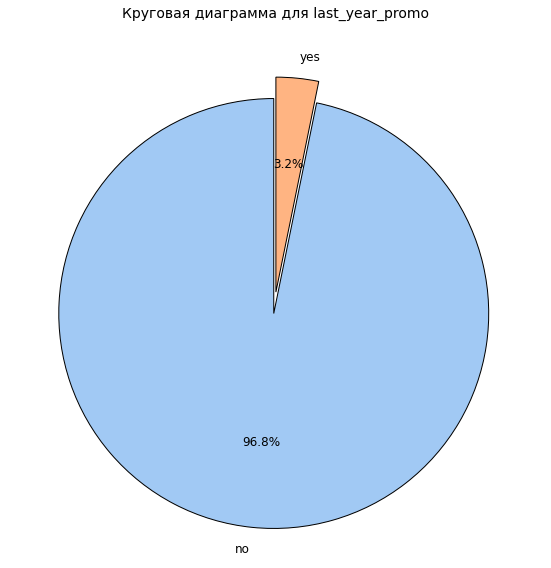

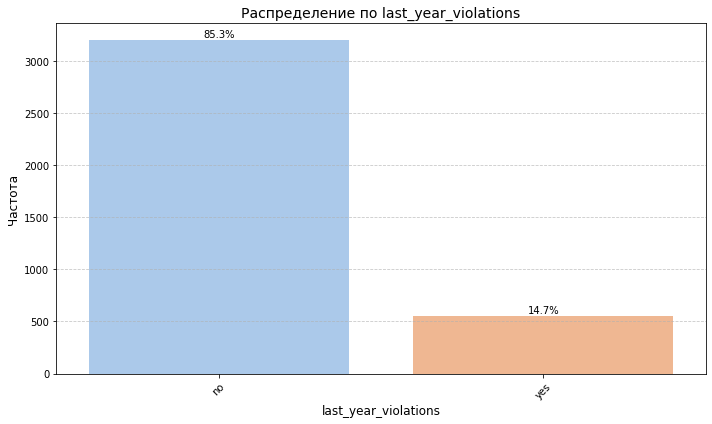

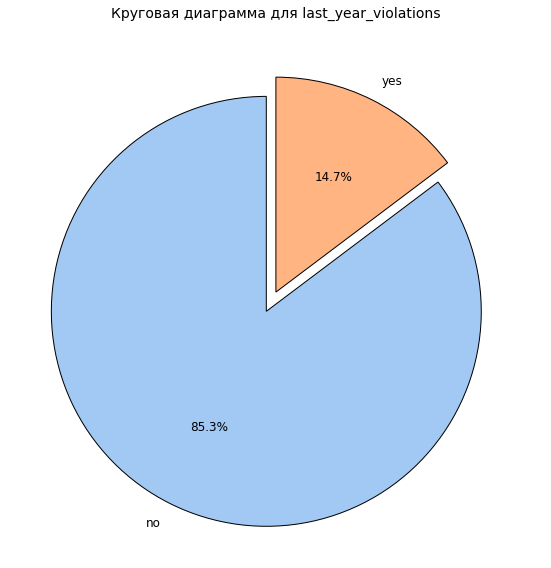

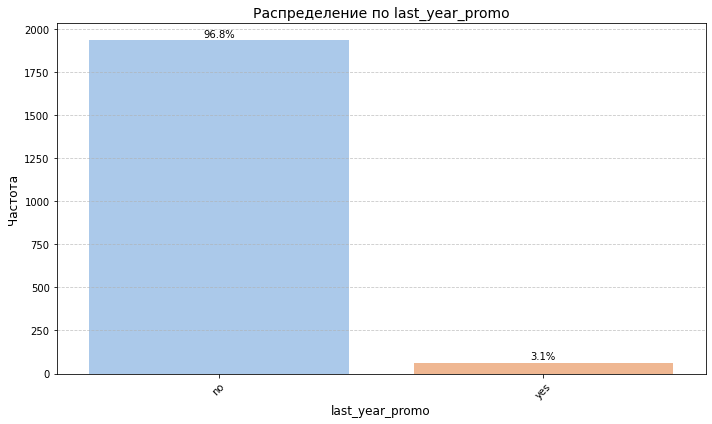

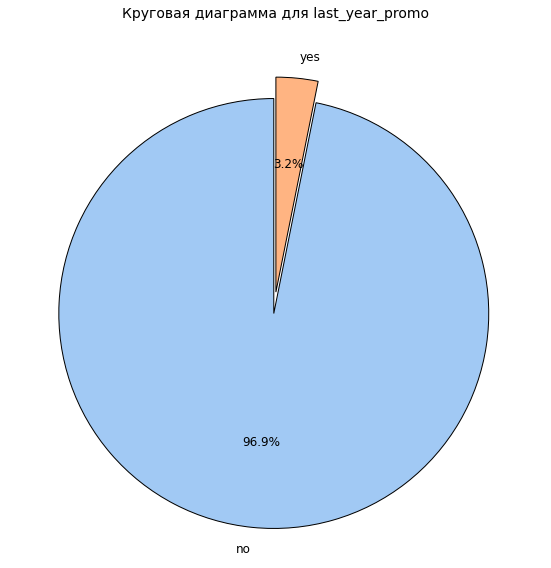

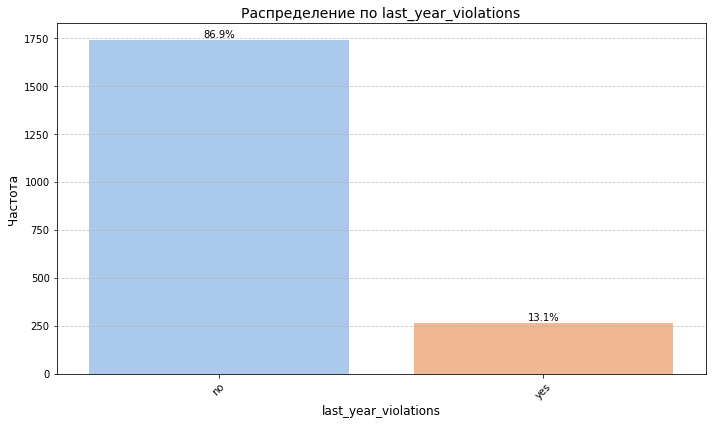

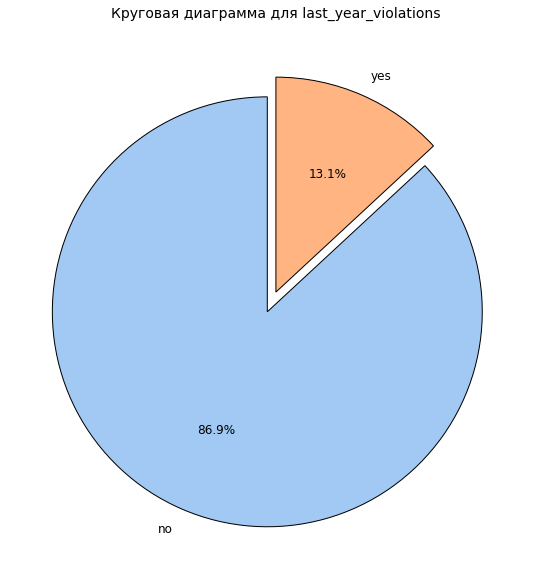

In [48]:
subset = ['last_year_promo', 'last_year_violations']
diogramm_func(train_clean, test, subset)

#### Корреляционный анализ данных

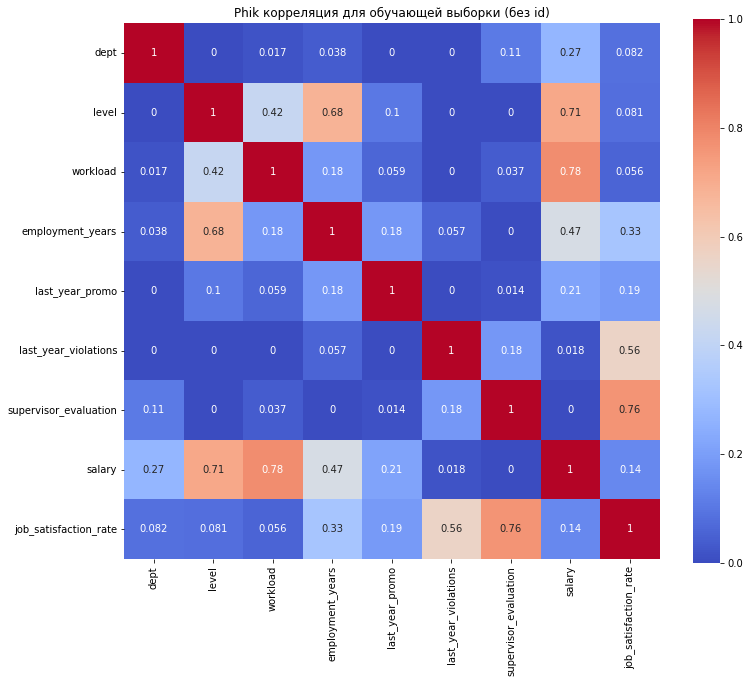

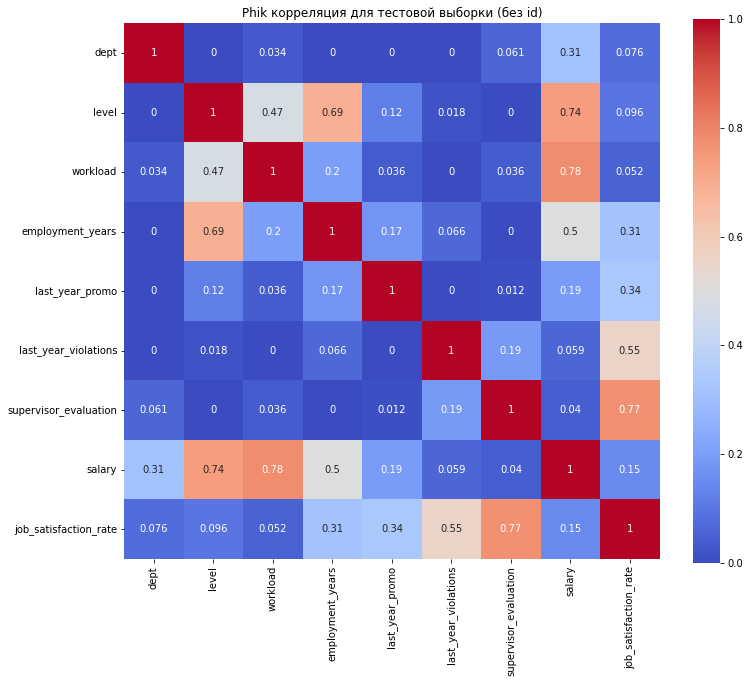

In [49]:
cols_to_use = [col for col in train.columns if col != 'id']

phik_matrix_train = train[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])
phik_matrix_test = test[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_train, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для обучающей выборки (без id)")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_test, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для тестовой выборки (без id)")
plt.show()


#### Выводы

<span style="font-size: 16px; font-family: Georgia;">*После удаления дубликатов распределение данных практически не изменилось*</span>

### Пайпланы

In [50]:
X_train_clean = train_clean.drop(columns=['job_satisfaction_rate', 'id'])
y_train = train_clean['job_satisfaction_rate']

X_test_clean = test.drop(columns=['job_satisfaction_rate', 'id'])
y_test = test['job_satisfaction_rate']



In [51]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
target_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


X_train = standardize_categories(X_train_clean, cat_columns)
X_test = standardize_categories(X_test, cat_columns)

for col in X_train.columns:
    if X_train[col].isna().any():
        if col in cat_columns:
            fill_value = X_train[col].mode()[0]
        else:
            fill_value = X_train[col].mean()
        
        X_train[col] = X_train[col].fillna(fill_value)
        X_test[col] = X_test[col].fillna(fill_value)

        
print(f"Тип X_train: {type(X_train)}")


ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

target_pipe = Pipeline([
    ('simpleImputer_target', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('target', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])


preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_columns),
    ('target', target_pipe, target_columns)
], remainder='drop')  

final_p = Pipeline([
    ('preprocessor', preprocessor),
    ('final_imputer', SimpleImputer(strategy='mean')), 
    ('model', LinearRegression())
])

param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [ElasticNet()],
        'model__alpha': [0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [DecisionTreeRegressor(random_state=42)],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'preprocessor__num__scaler': ['passthrough']  
    },
    {
        'model': [RandomForestRegressor(n_jobs=4, random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None],
        'model__min_samples_leaf': [1, 3],
        'preprocessor__num__scaler': ['passthrough']
    },
    {
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5],
        'preprocessor__num__scaler': ['passthrough']
    },
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [5, 7, 9, 11],
        'model__weights': ['uniform', 'distance'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    }
]

print("Начинаем поиск лучшей модели...")
grid = RandomizedSearchCV(
    final_p, 
    param_distributions=param_grid, 
    n_iter=100,
    cv=5, 
    scoring=smape_scorer, 
    n_jobs=-1,
    random_state=42
)

grid.fit(X_train, y_train)

best_single_model = grid.best_estimator_
print(f"Лучшая модель: {best_single_model}")
print(f"Лучший smape в кросс-валидации: {-grid.best_score_:.4f}")

# best_model_smape = smape(y_test, best_single_model.predict(X_test))
# print(f"Лучшая модель на тестовой выборке smape: {best_model_smape:.4f}")

# top_models = []
# models_added = set()  

# print("\nСоздаем топ-5 моделей для ансамбля...")
# for i in range(min(20, len(grid.cv_results_['params']))):
#     idx = (-grid.cv_results_['mean_test_score']).argsort()[i]
# #     idx = (grid.cv_results_['mean_test_score']).argsort()[::-1][i]

#     score = grid.cv_results_['mean_test_score'][idx]
    
#     if (score < 15) & (score > -15):  
#         params = grid.cv_results_['params'][idx]
#         model_type = f"{type(params['model']).__name__}"
#         if hasattr(params['model'], 'alpha'):
#             model_type += f"_alpha_{params['model'].alpha}"

#         if len(top_models) < 5 and model_type not in models_added:
#             print(f"Добавляем модель {params['model']} с smape: {score:.4f}")

#             model_pipeline = Pipeline([
#                 ('preprocessor', clone(preprocessor)),
#                 ('final_imputer', SimpleImputer(strategy='mean')),  
#                 ('model', clone(params['model']))
#             ])
#             model_pipeline.fit(X_train, y_train)

#             top_models.append((f'model_{i}', model_pipeline))
#             models_added.add(model_type)

# print("\nСоздаем ансамбли моделей...")
# if len(top_models) < 2:
#     print("Недостаточно разнообразных моделей, добавляем дополнительные...")
    
#     elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#     pipeline_en = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('model', elasticnet)
#     ])
#     pipeline_en.fit(X_train, y_train)
#     top_models.append(('elasticnet', pipeline_en))
    
#     gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05)
#     pipeline_gbr = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('model', gbr)
#     ])
#     pipeline_gbr.fit(X_train, y_train)
#     top_models.append(('gbr', pipeline_gbr))

# voting_ensemble = VotingRegressor(estimators=top_models)
# voting_ensemble.fit(X_train, y_train)

# stacking_ensemble = StackingRegressor(
#     estimators=top_models,
#     final_estimator=Ridge(alpha=0.5),
#     cv=5
# )
# stacking_ensemble.fit(X_train, y_train)

# print("\nСоздаем дополнительный ансамбль с заранее подобранными моделями...")
# custom_preprocessor = Pipeline([
#     ('column_transformer', clone(preprocessor)),
#     ('final_imputer', SimpleImputer(strategy='mean'))
# ])

custom_preprocessor.fit(X_train)
X_train_transformed = custom_preprocessor.transform(X_train)
X_test_transformed = custom_preprocessor.transform(X_test)

# elasticnet = ElasticNet(alpha=0.8, l1_ratio=0.7)
# elasticnet.fit(X_train_transformed, y_train)

# gbr_conservative = GradientBoostingRegressor(learning_rate=0.005, max_depth=2, min_samples_leaf=100)
# gbr_conservative.fit(X_train_transformed, y_train)

# gbr_moderate = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, min_samples_leaf=50)
# gbr_moderate.fit(X_train_transformed, y_train)

# rf = RandomForestRegressor(n_estimators=200, max_depth=10)
# rf.fit(X_train_transformed, y_train)

# custom_ensemble = VotingRegressor([
#     ('elasticnet', elasticnet),
#     ('gbr_conservative', gbr_conservative),
#     ('gbr_moderate', gbr_moderate),
#     ('rf', rf)
# ])
# custom_ensemble.fit(X_train_transformed, y_train)

# print("\nРезультаты оценки всех моделей на тестовой выборке:")
# voting_smape = smape(y_test, voting_ensemble.predict(X_test))
# stacking_smape = smape(y_test, stacking_ensemble.predict(X_test))
# custom_smape = smape(y_test, custom_ensemble.predict(X_test_transformed))

# print(f"Лучшая одиночная модель:       smape = {best_model_smape:.4f}")
# print(f"Ансамбль голосования (Voting):  smape = {voting_smape:.4f}")
# print(f"Ансамбль стекинга (Stacking):   smape = {stacking_smape:.4f}")
# print(f"Кастомный ансамбль моделей:     smape = {custom_smape:.4f}")

# all_models = {
#     "Лучшая одиночная": (best_single_model, best_model_smape),
#     "Voting ансамбль": (voting_ensemble, voting_smape),
#     "Stacking ансамбль": (stacking_ensemble, stacking_smape),
#     "Кастомный ансамбль": (custom_ensemble, custom_smape)
# }

# best_model_name = min(all_models, key=lambda k: all_models[k][1])
# best_model_final, best_smape = all_models[best_model_name]

# print(f"\nНаилучшая модель: {best_model_name} с smape = {best_smape:.4f}")


Тип X_train: <class 'pandas.core.frame.DataFrame'>
Начинаем поиск лучшей модели...
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('num',
                             

#### Важность признаков модели

[Функция feature_importance](#feature_importance)

Получено 12 имен признаков


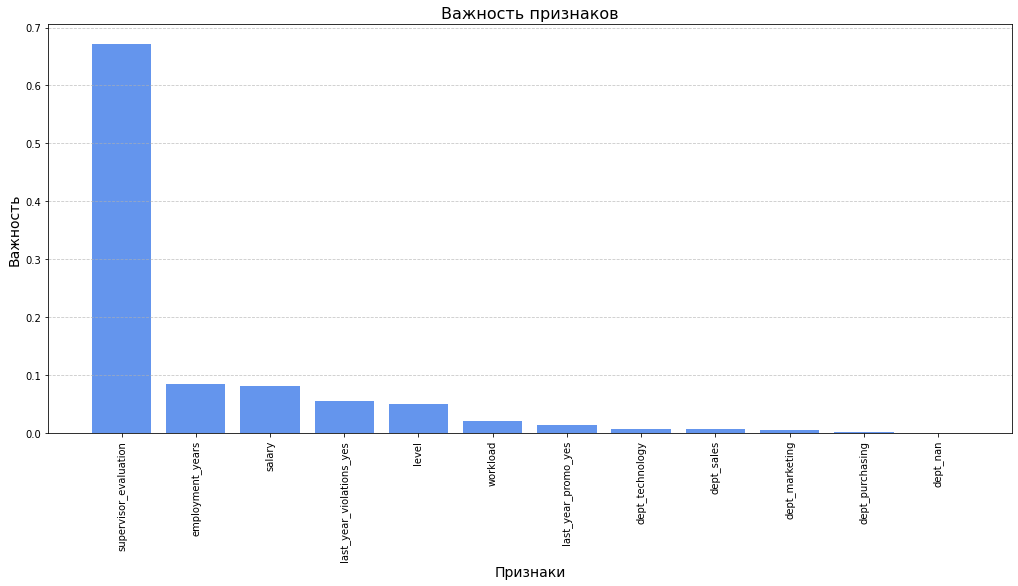


Топ-10 важных признаков:
1. supervisor_evaluation (важность: 0.6718)
2. employment_years (важность: 0.0852)
3. salary (важность: 0.0806)
4. last_year_violations_yes (важность: 0.0556)
5. level (важность: 0.0510)
6. workload (важность: 0.0205)
7. last_year_promo_yes (важность: 0.0133)
8. dept_technology (важность: 0.0077)
9. dept_sales (важность: 0.0066)
10. dept_marketing (важность: 0.0059)


In [52]:
feature_importance(X_train, X_test, y_train)

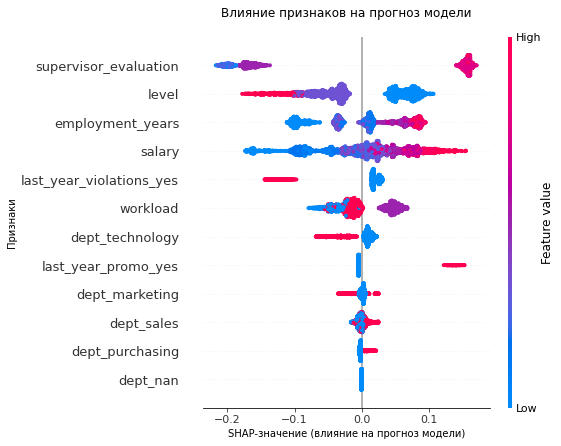

In [53]:
feature_names = get_feature_names(preprocessor)

model = GradientBoostingRegressor(
    learning_rate=0.05, 
    max_depth=5, 
    min_samples_leaf=50, 
    n_estimators=200, 
    subsample=0.6,
    random_state=42
)

model.fit(X_train_transformed, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)


plt.figure(figsize=(10, 8))


shap.summary_plot(
    shap_values, 
    X_train_transformed,
    feature_names=feature_names,
    show=False  
)

plt.title('Влияние признаков на прогноз модели', fontsize=12, pad=20)
plt.xlabel('SHAP-значение (влияние на прогноз модели)', fontsize=10)
plt.ylabel('Признаки', fontsize=10)

plt.tight_layout()

plt.show()

<span style="font-size: 16px; font-family: Georgia;">*После удаления дубликатов качество лучшей модели улучшилось, поэтому используе*</span>

## ___Выводы по задаче___

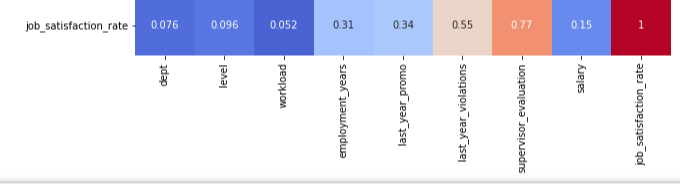

<span style="font-size: 20px; font-family: Georgia;">**🏆Лучшая модель**</span>

Модель GradientBoostingRegressor(max_depth=5, n_estimators=200)

- <span style="font-size: 14px; font-family: Georgia;">**Характеристики модели**</span>:
Учет линейной и нелинейной разделимости данных,
Робастность к шуму и выбросам,
Гибкость модели для разделения сложных классов

- <span style="font-size: 14px; font-family: Georgia;">**Производительность**</span>:
Значение метрики smape 10.8375 на тестовой выборке


<span style="font-size: 18px; font-family: Georgia;">**Анализ превосходства GradientBoostingRegressor**</span>

<span style="font-size: 16px; font-family: Georgia;">**Особенности данных**</span>
- **Нелинейные зависимости**  
  GradientBoosting эффективно моделирует сложные взаимодействия признаков через комбинацию слабых деревьев. Это указывает на наличие:
  - Неаддитивных эффектов между переменными
  - Пороговых зависимостей (например, "эффект насыщения")
  - Иерархических взаимовлияний признаков

- **Умеренная размерность**  
  Оптимальная работа на:
  - Немного признаков (без строгой линейной разделимости)
  - Отсутствие "проклятия размерности" (характерного для KNN)

- **Относительная чистота данных**  
  Высокая чувствительность к шуму компенсирована:
  - Регуляризацией (max_depth=3-5)

<span style="font-size: 18px; font-family: Georgia;">**Сравнение с другими моделями**</span>

| Модель               | Почему проиграла              | Вывод о данных |
|----------------------|-------------------------------|----------------|
| Линейные модели      | Линейные зависимости отсутствуют | Сильная нелинейность |
| SVM с RBF            | Недостаточный размер выборки  | n_samples < 10^4 |
| Decision Tree        | Высокая дисперсия единичного дерева | Требуется ансамблинг |
| KNN                  | Много шума или несбалансированные признаки | Локальные паттерны слабо выражены |


<span style="font-size: 20px; font-family: Georgia;">**📋Портрет неудовлетворённого сотрудника**</span>

<span style="font-size: 16px; font-family: Georgia;">**1. Влияние признаков на удовлетворённость сотрудников**</span>

- **Оценка супервайзера (supervisor_evaluation):**
  - Как видно из корреляционной матрицы, этот признак имеет самый высокий коэффициент корреляции с удовлетворённостью (0.77), что говорит о его ключевом значении. SHAP график также подтверждает, что высокая оценка со стороны руководителя сильно предсказывает удовлетворённость.

- **Наличие нарушений за прошлый год(last_year_violations):**
  - Высокий уровень корреляции (0.55) показывает что если сотрудник не удовлетворён работой, он с большей вероятностью будет нарушать трудовой договор.

- **Стаж (employment_years):**
  - Корреляция низкая (0.31), значит, стаж имеет значимое влияние. Однако SHAP показывает, что у сотрудников с большим стажем низкая удовлетворённость, что может быть связано с «выгоревшими» сотрудниками или отсутствием роста.
  
- **Заработная плата (salary):**
  - Корреляция между уровнем заработной платы и удовлетворённостью умеренная (0.15). SHAP значения показывают, что как низкий, так и высокий уровень зарплаты предсказывают удовлетворённость, но зарплата сама по себе не является решающим фактором для удовлетворённости сотрудников.

- **Уровень должности (level):**
  - Корреляция с удовлетворённостью (0.096) невысокая, но можно заметить, что сотрудники на начальных уровнях должностей склонны быть менее довольными, что также отражено на SHAP графике.

- **Нагрузка на работе (workload):**
  - Данный признак имеет низкое влияние (корреляция 0.052). SHAP показывает, что высокая нагрузка предсказывает низкую удовлетворённость, хотя её влияние в целом невелико по сравнению с другими факторами.

- **Повышение за последний год (last_year_promo_yes):**
  - Признак имеет положительный эффект: сотрудники, которые получили повышение, более удовлетворены своей работой.

<span style="font-size: 16px; font-family: Georgia;">**2. Портрет неудовлетворённого сотрудника**</span>
На основе выявленных зависимостей можно составить портрет типичного неудовлетворённого сотрудника:

- Низкая оценка со стороны руководителя (низкий показатель `supervisor_evaluation`) — самый значимый фактор неудовлетворённости.
- Подвергался взысканиям или нарушениям за прошлый год (`last_year_violations_yes`).
- Средний или низкий уровень заработной платы (особенно если сотрудники считают её несправедливой).
- Большой стаж работы (возможно, из-за отсутствия карьерного роста или профессионального выгорания).
- Низкий уровень должности (`level`), чаще всего сотрудники начального уровня менее удовлетворены.
- Сильная перегрузка (высокое значение `workload`) при отсутствии компенсации за переработки.
- Работал в департаменте с низким уровнем поддержки, например:
  - `dept_sales` (SHAP показывает тенденцию к большей неудовлетворённости, вероятно, из-за строгих требований).



## -----------------------------Задача 2----------------------------------------------------------------------------------------

## Загрузка данных

In [54]:
file_path = '/datasets/train_quit.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    train = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")

train.head(5)

       id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no  

In [55]:
file_path = '/datasets/test_features.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    X_test = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")

X_test.head(5)

       id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800  

In [56]:
file_path = '/datasets/test_target_quit.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")
    
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Файл должен быть в формате CSV")
    
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Нет прав на чтение файла {file_path}")
    
    y_test = pd.read_csv(file_path, encoding='utf-8')

except FileNotFoundError as e:
    print(f"Ошибка: {e}")
    
except PermissionError as e:
    print(f"Ошибка доступа: {e}")
    
except pd.errors.EmptyDataError:
    print("Файл пуст")
    
except pd.errors.ParserError:
    print("Ошибка при парсинге CSV файла")
    
except Exception as e:
    print(f"Непредвиденная ошибка: {e}")

y_test.head(5)

       id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

## Предобработка

In [57]:
x_test_ids = X_test['id'].tolist()

test = X_test.merge(y_test, on='id')

y_test = test.set_index('id').loc[x_test_ids, ['quit']].reset_index()


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [60]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [61]:
train.apply(lambda x: x.unique())

id                       [723290, 814010, 155091, 257132, 910140, 69991...
dept                        [sales, purchasing, marketing, technology, hr]
level                                             [middle, junior, sinior]
workload                                               [high, medium, low]
employment_years                           [2, 5, 1, 8, 4, 7, 3, 9, 6, 10]
last_year_promo                                                  [no, yes]
last_year_violations                                             [no, yes]
supervisor_evaluation                                      [4, 1, 3, 5, 2]
salary                   [54000, 27600, 37200, 24000, 25200, 18000, 444...
quit                                                             [no, yes]
dtype: object

In [62]:
train['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [63]:
X_test.apply(lambda x: x.unique())

id                       [485046, 686555, 467458, 418655, 789145, 42997...
dept                     [marketing, hr, sales, purchasing, technology,...
level                                        [junior, middle, sinior, nan]
workload                                            [medium, low, high,  ]
employment_years                           [2, 1, 5, 6, 3, 9, 7, 4, 8, 10]
last_year_promo                                                  [no, yes]
last_year_violations                                             [no, yes]
supervisor_evaluation                                      [5, 4, 3, 1, 2]
salary                   [28800, 30000, 19200, 40800, 42000, 26400, 492...
dtype: object

In [64]:
X_test['workload'] = X_test['workload'].replace(' ', np.nan)
X_test['workload'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [65]:
y_test['quit'].unique()

array(['no', 'yes'], dtype=object)

In [66]:
# y_test = y_test.replace({"yes": 1, "no": 0})
# train['quit'] = train['quit'].replace({"yes": 1, "no": 0})
# y_test['quit'].unique()

In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['quit'] = le.fit_transform(train['quit'])
y_test['quit'] = le.transform(y_test['quit'])

In [68]:
train

          id        dept   level workload  employment_years last_year_promo  \
0     723290       sales  middle     high                 2              no   
1     814010       sales  junior   medium                 2              no   
2     155091  purchasing  middle   medium                 5              no   
3     257132       sales  junior   medium                 2              no   
4     910140   marketing  junior   medium                 2              no   
...      ...         ...     ...      ...               ...             ...   
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3997  536432  purchasing  junior      low                 2              no   
3998  692133  purchasing  middle   medium                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  s

In [69]:
X_test['dept'] = X_test['dept'].replace(' ', np.nan)
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

In [70]:
for data in [train, X_test]:
    obj_columns = data.select_dtypes(include=['object']).columns
    data[obj_columns] = data[obj_columns].apply(lambda x: x.str.lower().str.replace(' ', '_', regex=False))


In [71]:
train.describe()

                  id  employment_years  supervisor_evaluation        salary  \
count    4000.000000       4000.000000            4000.000000   4000.000000   
mean   552099.283750          3.701500               3.474750  33805.800000   
std    260158.031387          2.541852               1.004049  15152.415163   
min    100222.000000          1.000000               1.000000  12000.000000   
25%    327785.750000          2.000000               3.000000  22800.000000   
50%    546673.000000          3.000000               4.000000  30000.000000   
75%    781497.750000          6.000000               4.000000  43200.000000   
max    999915.000000         10.000000               5.000000  96000.000000   

             quit  
count  4000.00000  
mean      0.28200  
std       0.45003  
min       0.00000  
25%       0.00000  
50%       0.00000  
75%       1.00000  
max       1.00000  

[Функция boxplot_func](#boxplot_func)

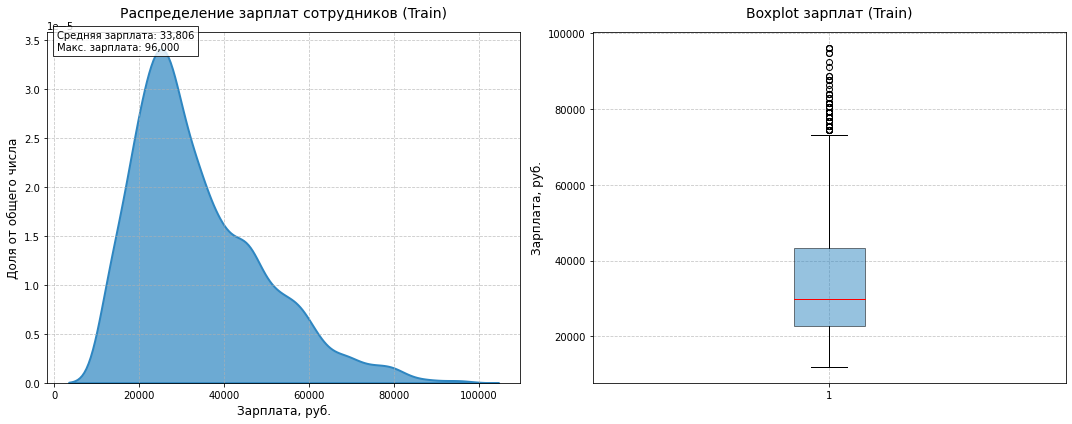

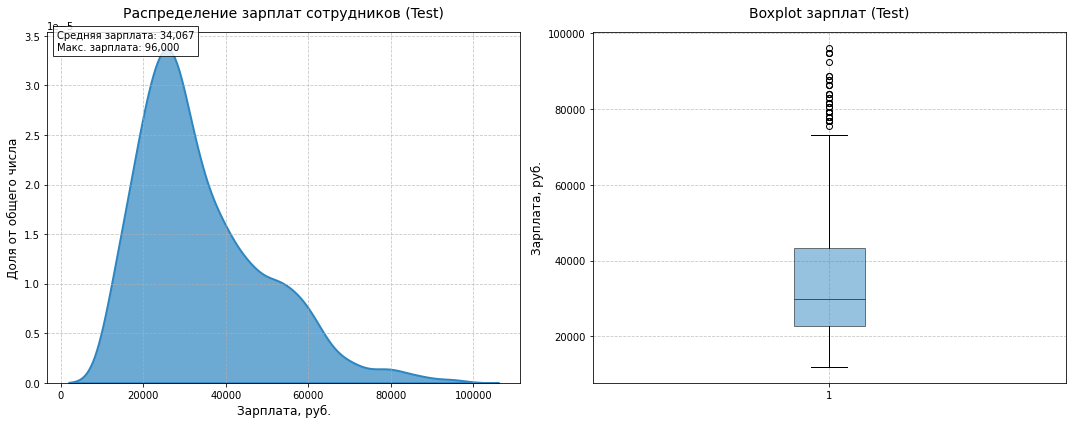

In [72]:
boxplot_func(train, test)

In [73]:
train.duplicated(subset=train.columns.drop('id')).sum()

1413

In [74]:
X_test.duplicated(subset=X_test.columns.drop('id')).sum()

557

In [75]:
common_ids = set(train['id']).intersection(set(train['id']))
print(f"Общее количество id: {len(common_ids)}")


Общее количество id: 4000


In [76]:
train.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [77]:
X_test

          id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  s

In [78]:
test

          id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  s

In [79]:
features = [
    'dept', 'level', 'workload', 'employment_years',
    'last_year_promo', 'last_year_violations',
    'supervisor_evaluation', 'salary'
]

X_train = train[features]
X_test = test[features]

train_transformed = custom_preprocessor.transform(X_train)
test_transformed = custom_preprocessor.transform(X_test)

train['job_satisfaction_rate'] = model.predict(train_transformed)
test['job_satisfaction_rate'] = model.predict(test_transformed)

print(test[['id', 'quit', 'job_satisfaction_rate']].head())


       id quit  job_satisfaction_rate
0  485046   no               0.810970
1  686555   no               0.651487
2  467458   no               0.645505
3  418655   no               0.659030
4  789145   no               0.797912


In [80]:
y_test = y_test.drop(columns=['id'])

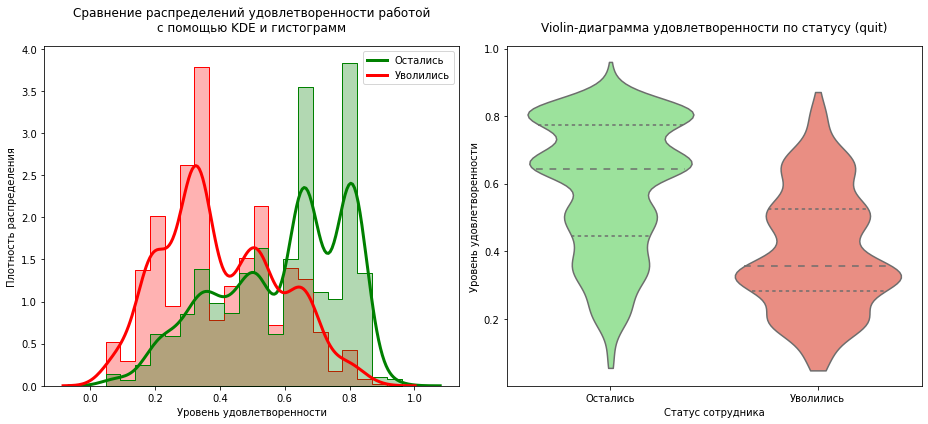

In [81]:
def plot_job_satisfaction(df):
    required_columns = ['job_satisfaction_rate', 'quit']
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"В датафрейме отсутствуют следующие необходимые столбцы: {missing_cols}")

    plt.figure(figsize=(13, 6))
    
    plt.subplot(1, 2, 1)

    sns.histplot(data=df, x='job_satisfaction_rate', hue='quit',
                 element='step', stat='density', common_norm=False,
                 bins=20, alpha=0.3, palette={0: 'green', 1: 'red'})
    sns.kdeplot(data=df[df['quit']==0], x='job_satisfaction_rate', 
                color='green', label='Остались', linewidth=3)
    sns.kdeplot(data=df[df['quit']==1], x='job_satisfaction_rate', 
                color='red', label='Уволились', linewidth=3)
    plt.title('Сравнение распределений удовлетворенности работой\nс помощью KDE и гистограмм', pad=15)
    plt.xlabel('Уровень удовлетворенности')
    plt.ylabel('Плотность распределения')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x='quit', y='job_satisfaction_rate', 
                   palette={0: 'lightgreen', 1: 'salmon'}, cut=0,
                   inner='quartile', scale='width')
    plt.title('Violin-диаграмма удовлетворенности по статусу (quit)', pad=15)
    plt.xlabel('Статус сотрудника')
    plt.ylabel('Уровень удовлетворенности')
    plt.xticks([0,1], ['Остались', 'Уволились'])
    
    plt.tight_layout()
    plt.show()
    

plot_job_satisfaction(train)


## Без удаления дубликатов

### Исследовательский анализ данных

[Функция histogramm_func](#histogramm_func)

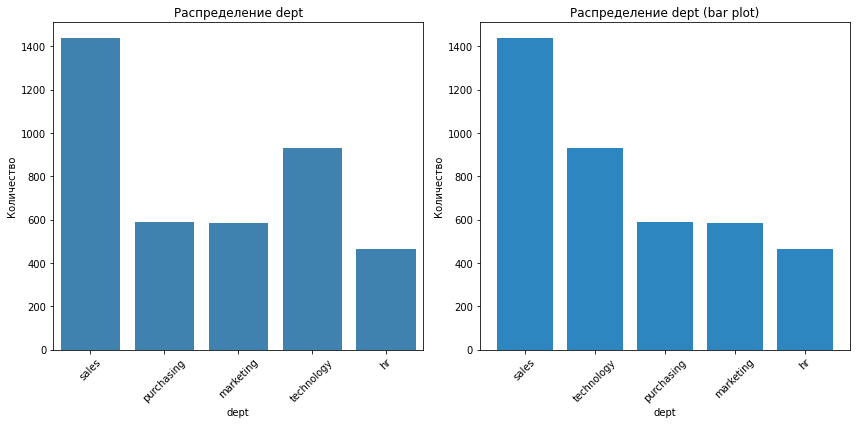

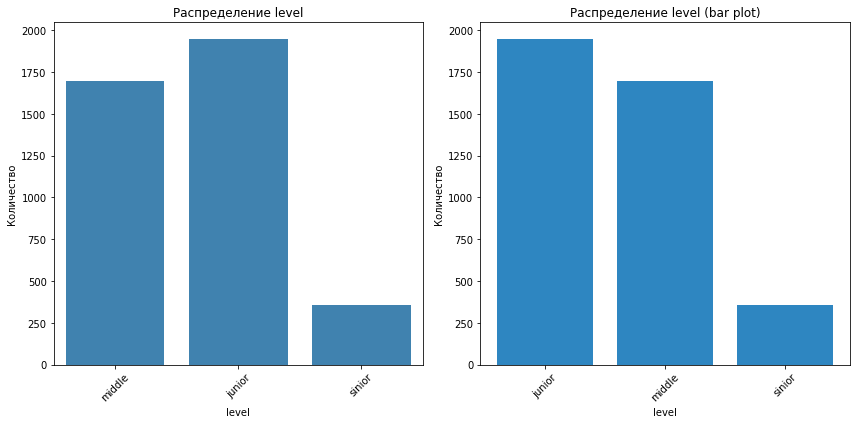

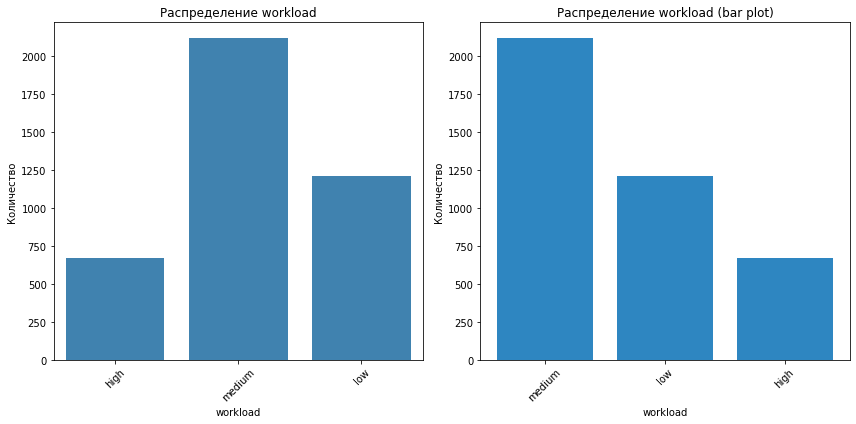

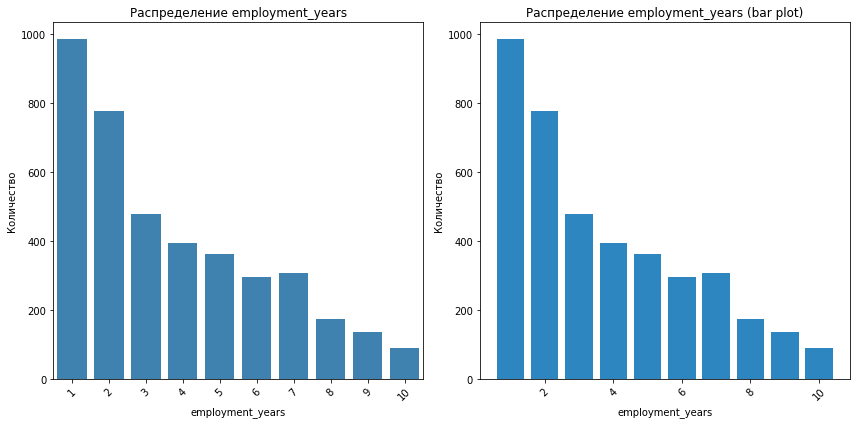

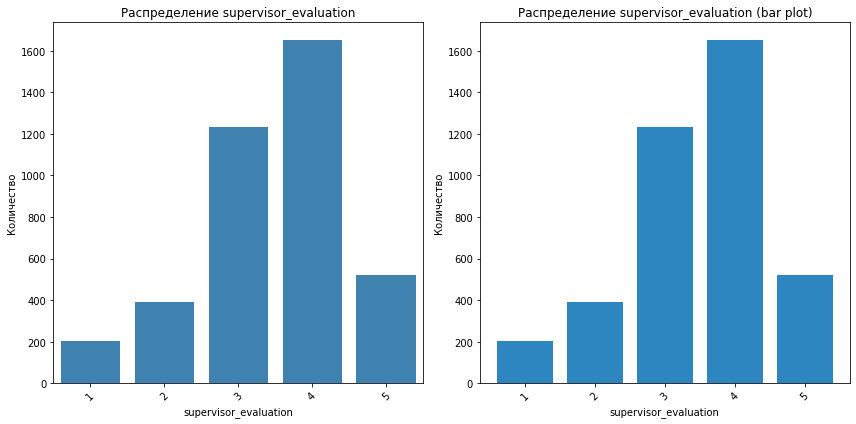

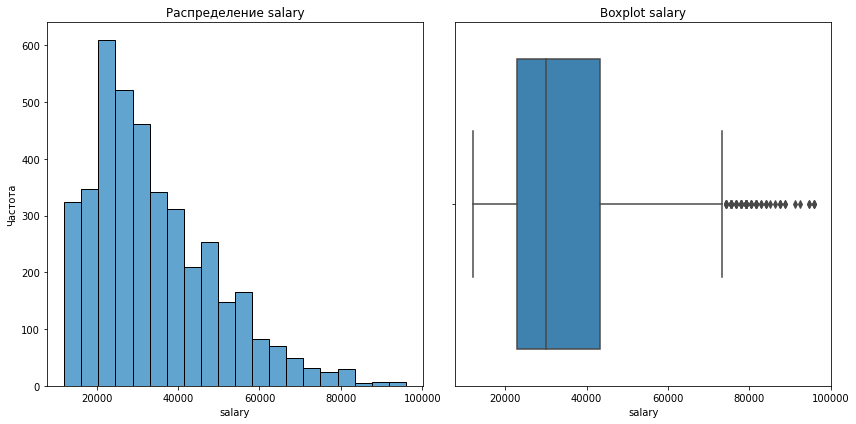

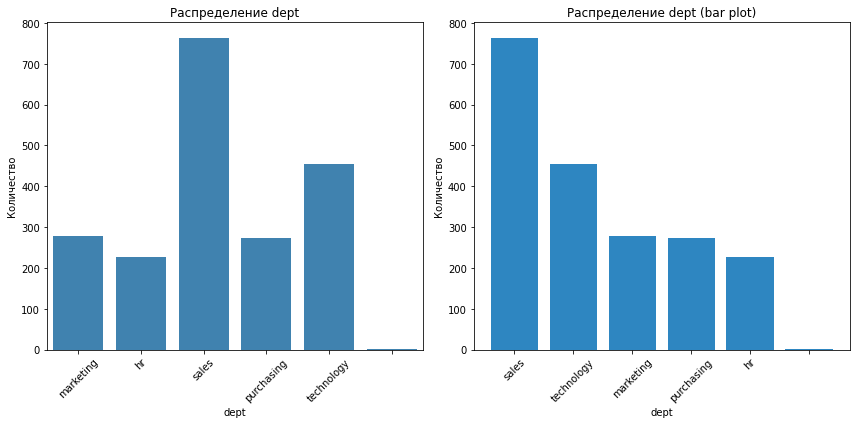

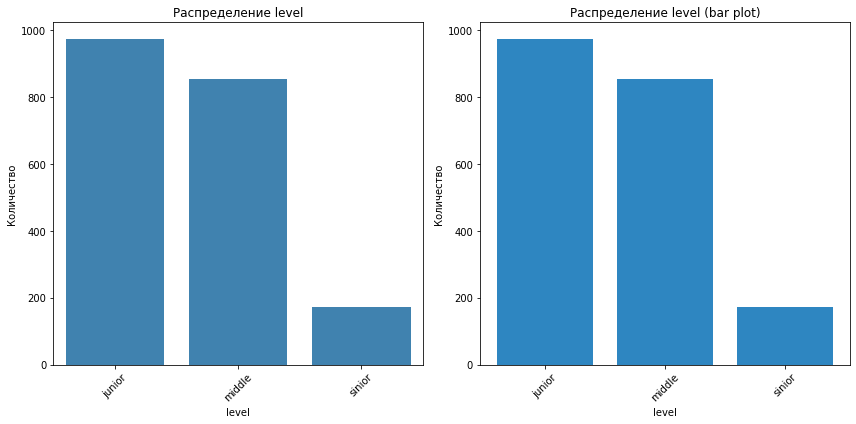

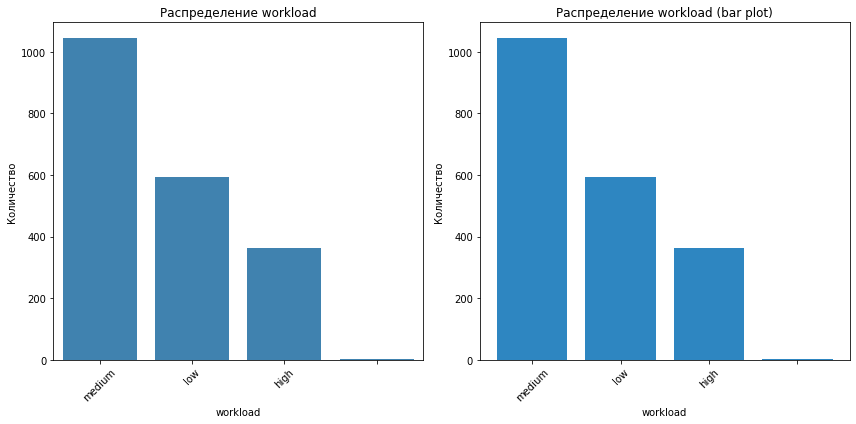

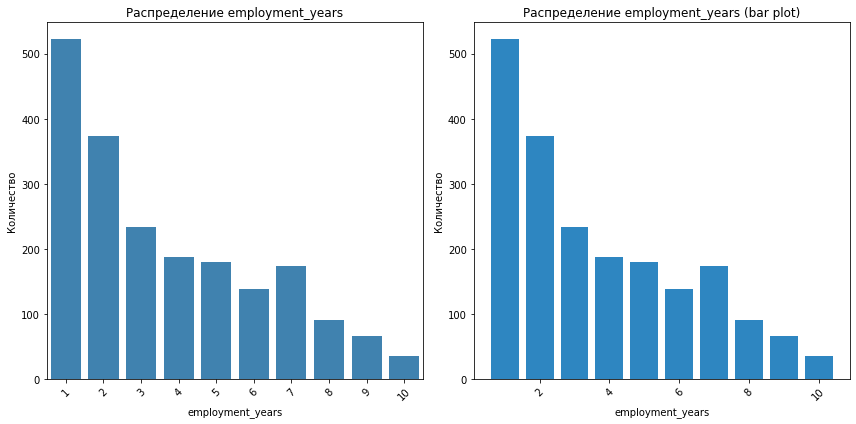

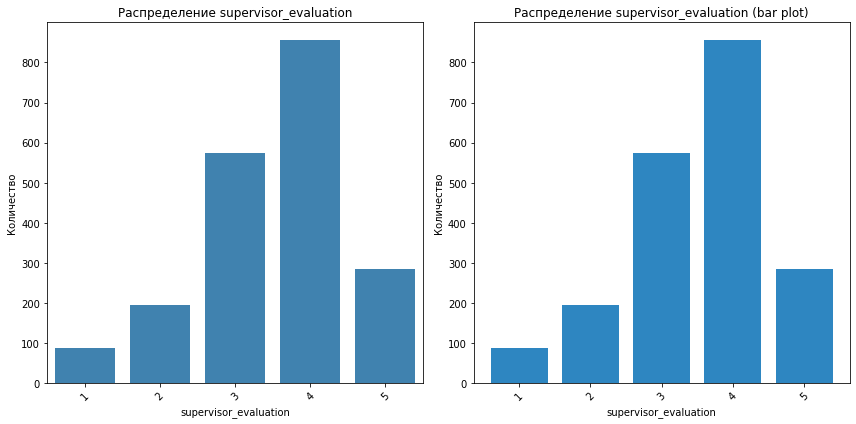

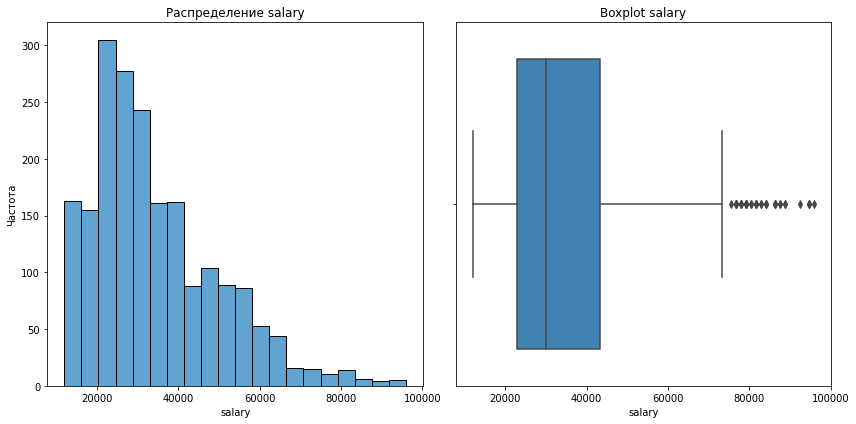

In [82]:
subset = ['dept', 'level', 'workload', 'employment_years',
           'supervisor_evaluation',
           'salary']
histogramm_func(train, test, subset)

Данные незначительно отличаются от первой задачи:

- отдел маркентинга немного обогнал отдел закупок по количеству сотрудников
- оценки немного ухудшились

[Функция diogramm_func](#diogramm_func)

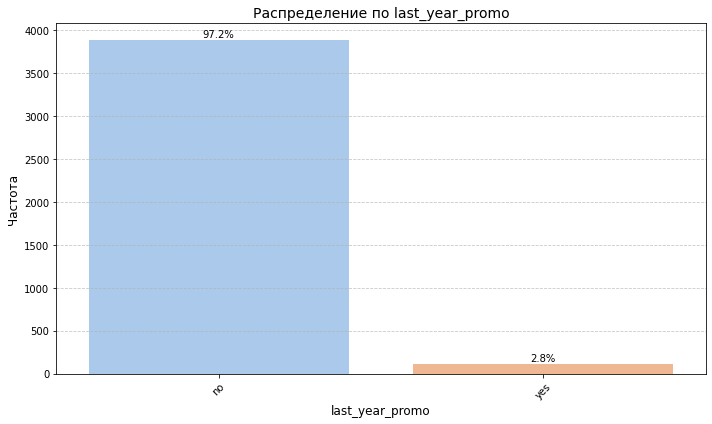

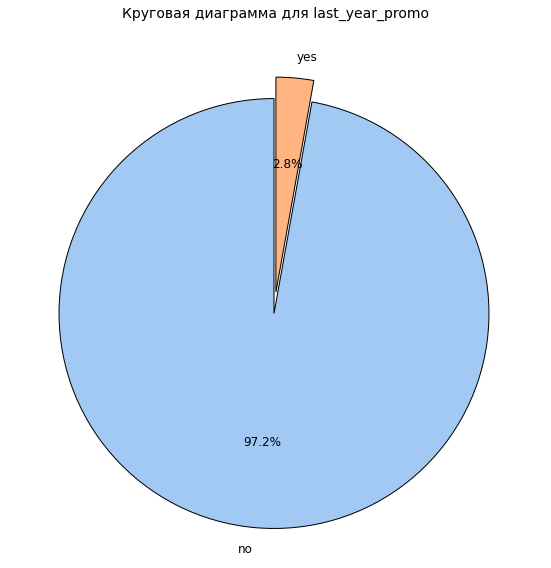

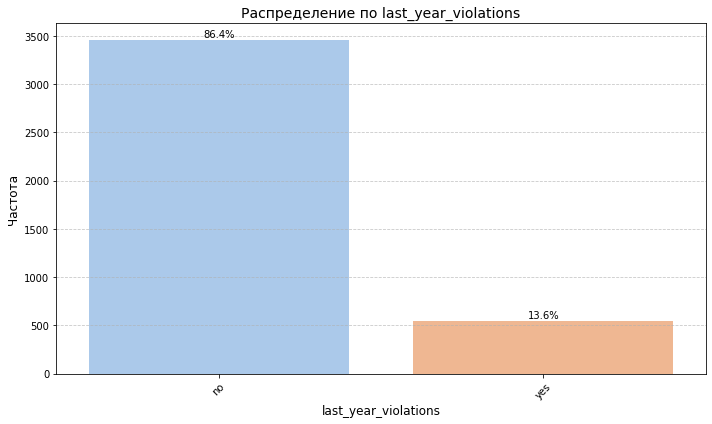

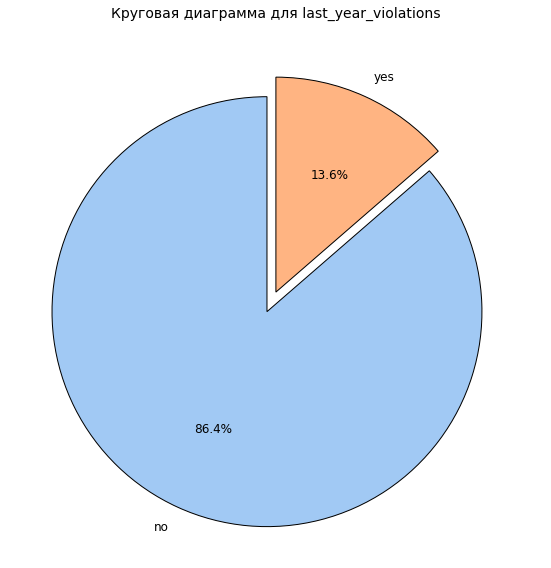

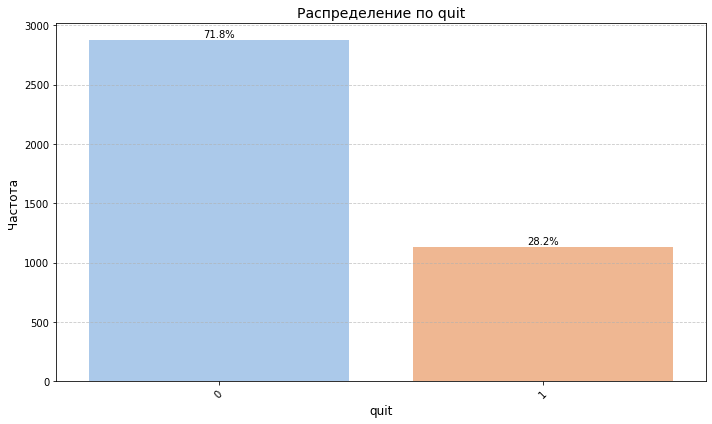

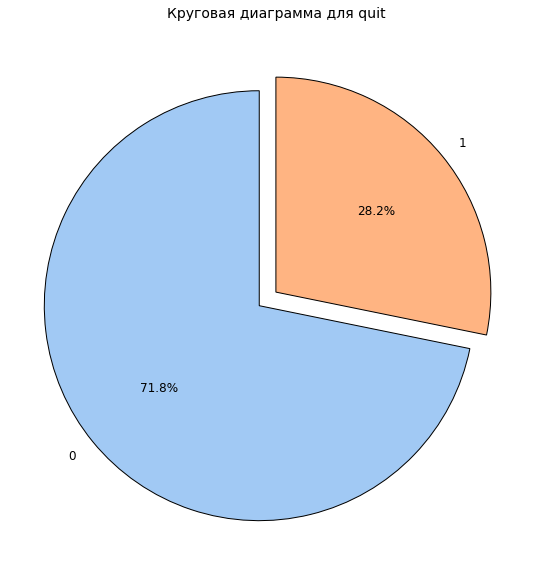

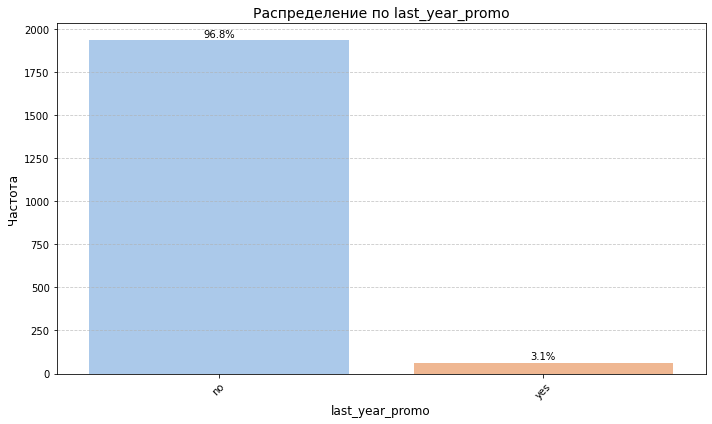

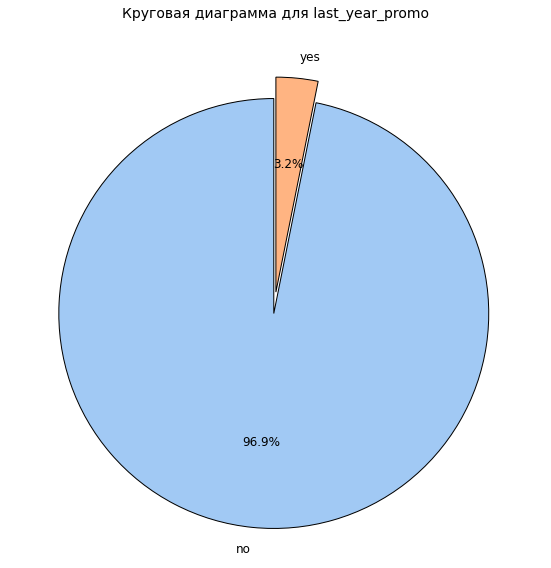

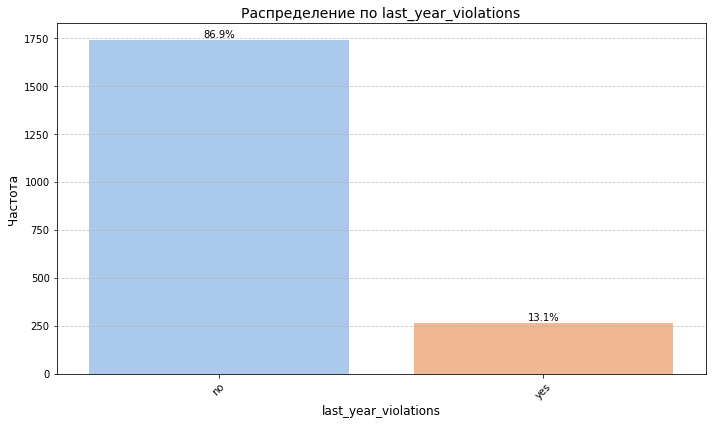

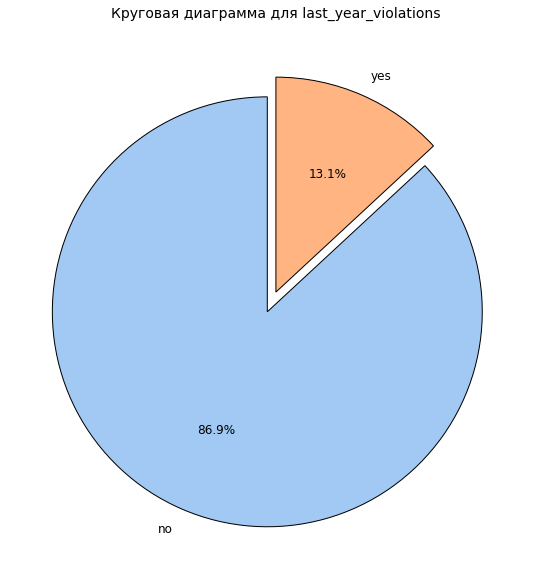

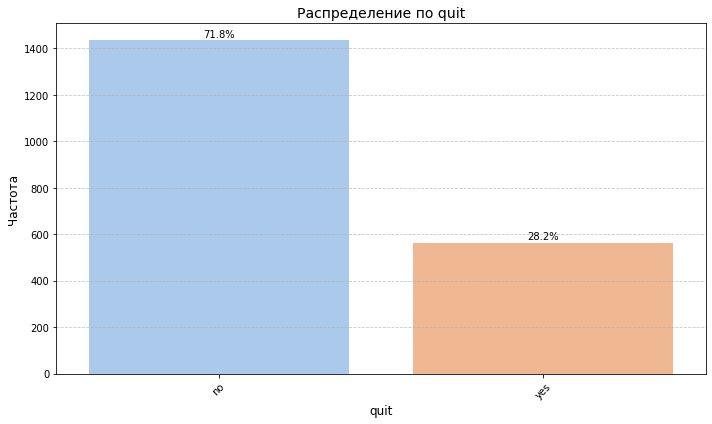

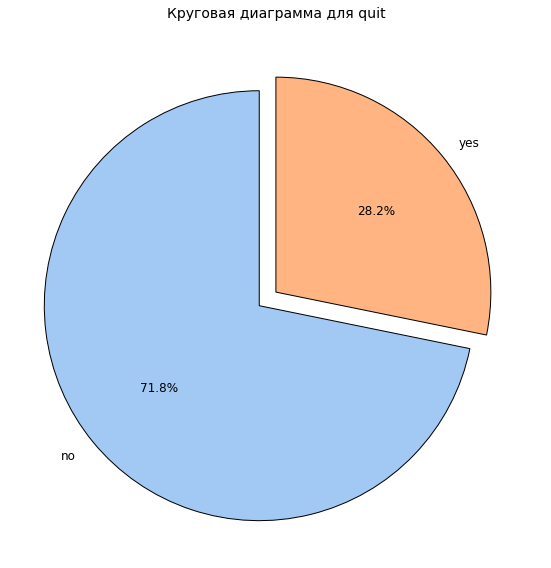

In [83]:
subset = ['last_year_promo', 'last_year_violations', 'quit']
diogramm_func(train, test, subset)


<span style="font-size: 18px; font-family: Georgia;">*В наших моделях используем балансировку классов*</span>

#### Корреляционный анализ данных

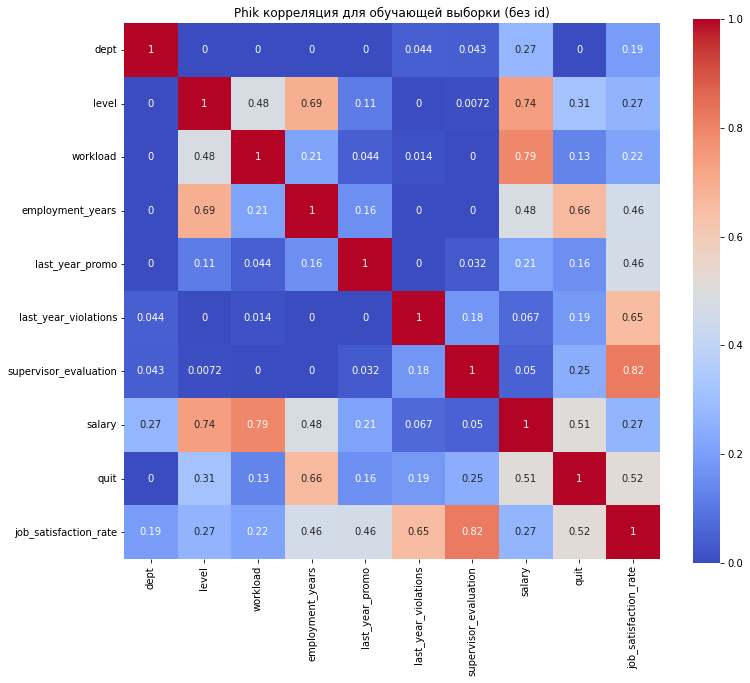

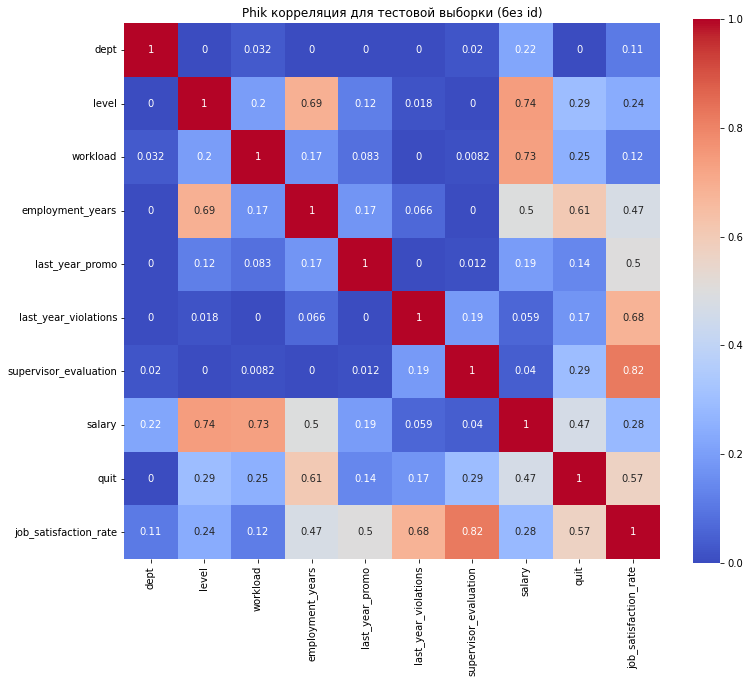

In [84]:
cols_to_use = [col for col in train.columns if col != 'id']

phik_matrix_train = train[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])
phik_matrix_test = test[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_train, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для обучающей выборки (без id)")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_test, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для тестовой выборки (без id)")
plt.show()


#### ___Выводы о данных___


Видим <span style="font-size: 14px; font-family: Georgia;">**сильную корреляцию**</span> между Зарплатой и:
- Уровнем должности
- Загруженностью
- Стажем 

Также <span style="font-size: 14px; font-family: Georgia;">**сильная связь**</span> между:
- Уровнем должности и Стажем
- Оценкой работы сотрудника и Удовлетворённостью работой

<span style="font-size: 14px; font-family: Georgia;">**Небольшая связь**</span> между:
- Удовлетворённостью работой и Стажем
- Уценкой работы сотрудника и Зарплатой
- Загруженностью и Уровнем должности
- Загруженностью и Стажем

<span style="font-size: 14px; font-family: Georgia;">**Сильная обратная связь**</span> между Увольнением и :
- Уровнем должности
- Загруженностью
- Стажем
- Оценкой работы сотрудника
- Зарплатой

<span style="font-size: 16px; font-family: Georgia;">**Выводы о данных**</span>

- Почти никто не получал повышение за последний год
- Небольшое число сотрудников(каждый 7ой) совершали нарушения за последний год
- Большинство сотрудников работают в продажах и технологиях, остальные в закупках, маркетинге и hr.
- Джунов и мидлов много, сеньёров сильно меньше.
- Сотрудников не нагруженных немного больше чем сильно нагруженных и меньше чем средне нагруженных.
- Стаж работы не подчиняется никакому явному распределению.
- Чаще всего сотрудники получают оценки 3 и 4.
- Зарплаты распределены Пуассоноски со средним в 33800.
- Данные распределены примерно одинаково в тренировочной и тестовой выборках.

<span style="font-size: 16px; font-family: Georgia;">*Мы можем перейти к использованию данных для обучения и проверки моделей, помня про наличие пропусков в данных*</span>

### Пайплайны

In [85]:
X_train = train.drop(columns=['quit', 'id'])
y_train = train['quit']
# y_train = y_train.astype(int)
# y_train = y_train.astype(int)

In [86]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']

X_train = standardize_categories(X_train, cat_columns)
X_test = standardize_categories(X_test, cat_columns)


In [87]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
target_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

        

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

target_pipe = Pipeline([
    ('simpleImputer_target', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('target', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])


preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_columns),
    ('target', target_pipe, target_columns)
], remainder='drop')  

final_p = Pipeline([
    ('preprocessor', preprocessor),
    ('final_imputer', SimpleImputer(strategy='mean')), 
    ('models', LogisticRegression(random_state=42))
])

param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 31),  
        'models__weights': ['uniform', 'distance'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    },
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 31),  
        'models__min_samples_leaf': [1, 2, 5, 10],
        'models__min_samples_split': [2, 5, 10, 20],
        'models__criterion': ['gini', 'entropy'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=42, probability=True)],
        'models__C': np.linspace(0.1, 10, 10),  
        'models__kernel': ['rbf', 'poly', 'linear'],
        'models__gamma': ['scale', 'auto'],
        'models__decision_function_shape': ['ovr', 'ovo'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=42, solver='saga', max_iter=50000)],
        'models__C': range(1, 8),
        'models__penalty': ['l1', 'l2', 'elasticnet'],
        'models__l1_ratio': [None, 0.5, 0.7, 0.9], 
        'models__class_weight': [None, 'balanced'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

print("Начинаем поиск лучшей модели...")
grid = RandomizedSearchCV(
    final_p, 
    param_distributions=param_grid, 
    n_iter=100,
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1,
    random_state=42
)

grid.fit(X_train, y_train)

best_single_model = grid.best_estimator_
print(f"Лучшая модель: {best_single_model}")
print(f"Лучший roc_auc в кросс-валидации: {grid.best_score_:.4f}")

# best_model_roc_auc = roc_auc_score(y_test, best_single_model.predict(X_test))
# print(f"Лучшая модель на тестовой выборке roc_auc: {best_model_roc_auc:.4f}")

# top_models = []
# models_added = set()  

# print("\nСоздаем топ-5 моделей для ансамбля...")
# for i in range(min(20, len(grid.cv_results_['params']))):
#     idx = (-grid.cv_results_['mean_test_score']).argsort()[i]
# #     idx = (grid.cv_results_['mean_test_score']).argsort()[::-1][i]

#     score = grid.cv_results_['mean_test_score'][idx]
    
#     if (score < 15) & (score > -15):  
#         params = grid.cv_results_['params'][idx]
#         model_type = f"{type(params['models']).__name__}"
#         if hasattr(params['models'], 'alpha'):
#             model_type += f"_alpha_{params['models'].alpha}"

#         if len(top_models) < 5 and model_type not in models_added:
#             print(f"Добавляем модель {params['models']} с roc_auc: {score:.4f}")

#             model_pipeline = Pipeline([
#                 ('preprocessor', clone(preprocessor)),
#                 ('final_imputer', SimpleImputer(strategy='mean')),  
#                 ('models', clone(params['models']))
#             ])
#             model_pipeline.fit(X_train, y_train)

#             top_models.append((f'model_{i}', model_pipeline))
#             models_added.add(model_type)

# print("\nСоздаем ансамбли моделей...")
# if len(top_models) < 2:
#     print("Недостаточно разнообразных моделей, добавляем дополнительные...")
    
#     log_reg = LogisticRegression(C=0.1, solver='saga', max_iter=10000)
#     pipeline_en = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('models', log_reg)
#     ])
#     pipeline_en.fit(X_train, y_train)
#     top_models.append(('log_reg', pipeline_en))
    
#     gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
#     pipeline_gbr = Pipeline([
#         ('preprocessor', clone(preprocessor)),
#         ('final_imputer', SimpleImputer(strategy='mean')),
#         ('models', gbr)
#     ])
#     pipeline_gbr.fit(X_train, y_train)
#     top_models.append(('gbr', pipeline_gbr))

# voting_ensemble = VotingClassifier(estimators=top_models, voting='soft')
# voting_ensemble.fit(X_train, y_train)

# stacking_ensemble = StackingClassifier(
#     estimators=top_models,
#     final_estimator=LogisticRegression(),
#     cv=5
# )
# stacking_ensemble.fit(X_train, y_train)

# print("\nСоздаем дополнительный ансамбль с заранее подобранными моделями...")
# custom_preprocessor = Pipeline([
#     ('column_transformer', clone(preprocessor)),
#     ('final_imputer', SimpleImputer(strategy='mean'))
# ])

custom_preprocessor.fit(X_train)
X_train_transformed = custom_preprocessor.transform(X_train)
X_test_transformed = custom_preprocessor.transform(X_test)

# elasticnet_classifier = LogisticRegression(C=0.8, solver='saga')  # Instead of ElasticNet
# elasticnet_classifier.fit(X_train_transformed, y_train)

# gbr_conservative = GradientBoostingClassifier(learning_rate=0.005, max_depth=2, min_samples_leaf=100)
# gbr_conservative.fit(X_train_transformed, y_train)

# gbr_moderate = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_leaf=50)
# gbr_moderate.fit(X_train_transformed, y_train)

# rf = RandomForestClassifier(n_estimators=200, max_depth=10)
# rf.fit(X_train_transformed, y_train)

# custom_ensemble = VotingClassifier([
#     ('elasticnet', elasticnet_classifier),
#     ('gbr_conservative', gbr_conservative),
#     ('gbr_moderate', gbr_moderate),
#     ('rf', rf)
# ], voting='soft')
# custom_ensemble.fit(X_train_transformed, y_train)

# print("\nРезультаты оценки всех моделей на тестовой выборке:")
# voting_roc_auc = roc_auc_score(y_test, voting_ensemble.predict_proba(X_test)[:, 1])
# stacking_roc_auc = roc_auc_score(y_test, stacking_ensemble.predict_proba(X_test)[:, 1])
# custom_roc_auc = roc_auc_score(y_test, custom_ensemble.predict_proba(X_test_transformed)[:, 1])

# print(f"Лучшая одиночная модель:       roc_auc = {best_model_roc_auc:.4f}")
# print(f"Ансамбль голосования (Voting):  roc_auc = {voting_roc_auc:.4f}")
# print(f"Ансамбль стекинга (Stacking):   roc_auc = {stacking_roc_auc:.4f}")
# print(f"Кастомный ансамбль моделей:     roc_auc = {custom_roc_auc:.4f}")

# all_models = {
#     "Лучшая одиночная": (best_single_model, best_model_roc_auc),
#     "Voting ансамбль": (voting_ensemble, voting_roc_auc),
#     "Stacking ансамбль": (stacking_ensemble, stacking_roc_auc),
#     "Кастомный ансамбль": (custom_ensemble, custom_roc_auc)
# }

# best_model_name = max(all_models, key=lambda k: all_models[k][1])
# best_model_final, best_roc_auc = all_models[best_model_name]

# print(f"\nНаилучшая модель: {best_model_name} с roc_auc = {best_roc_auc:.4f}")

Начинаем поиск лучшей модели...
Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
  

#### Важность признаков модели

[функция feature_importance](#feature_importance)

Получено 11 имен признаков


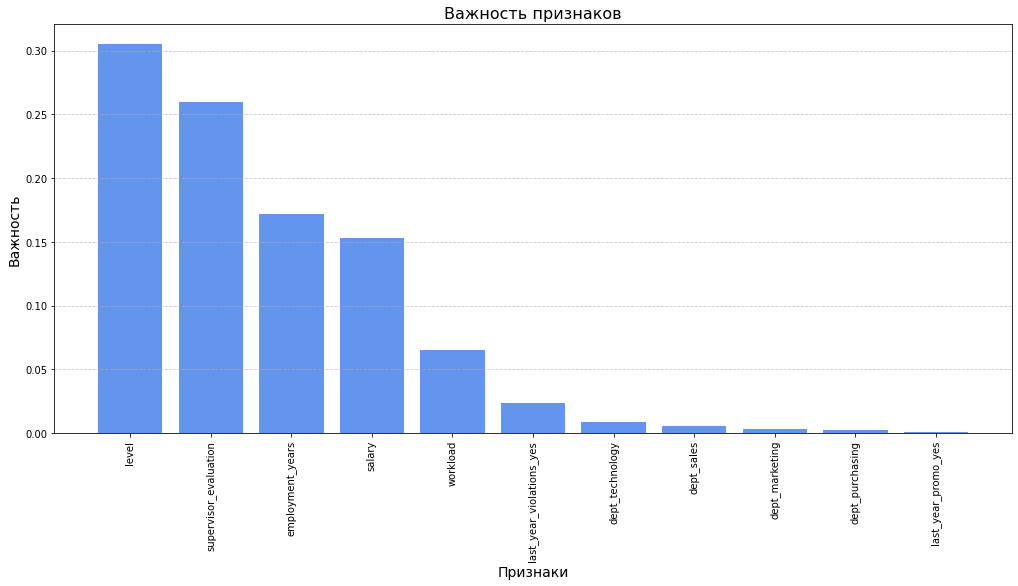


Топ-10 важных признаков:
1. level (важность: 0.3053)
2. supervisor_evaluation (важность: 0.2599)
3. employment_years (важность: 0.1716)
4. salary (важность: 0.1528)
5. workload (важность: 0.0652)
6. last_year_violations_yes (важность: 0.0236)
7. dept_technology (важность: 0.0088)
8. dept_sales (важность: 0.0059)
9. dept_marketing (важность: 0.0034)
10. dept_purchasing (важность: 0.0027)


In [89]:
feature_importance(X_train, X_test, y_train)

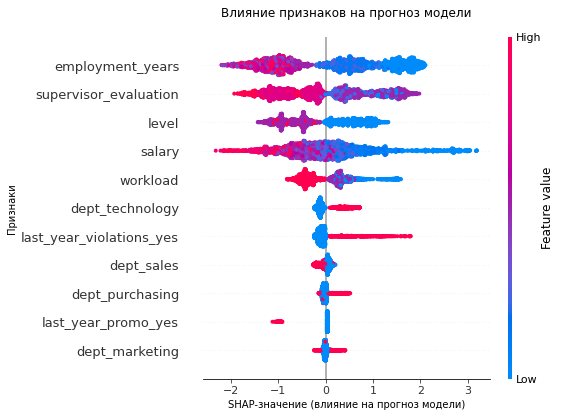

In [90]:
feature_names = get_feature_names(preprocessor)

model = GradientBoostingClassifier(
    learning_rate=0.05, 
    max_depth=5, 
    min_samples_leaf=50, 
    n_estimators=200, 
    subsample=0.6,
    random_state=42
)

model.fit(X_train_transformed, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)


plt.figure(figsize=(10, 8))


shap.summary_plot(
    shap_values, 
    X_train_transformed,
    feature_names=feature_names,
    show=False  
)

plt.title('Влияние признаков на прогноз модели', fontsize=12, pad=20)
plt.xlabel('SHAP-значение (влияние на прогноз модели)', fontsize=10)
plt.ylabel('Признаки', fontsize=10)

plt.tight_layout()

plt.show()

## С удалением дубликатов

In [91]:
train.duplicated(subset=train.columns.drop('id')).sum()

1413

In [92]:
train = train.drop_duplicates(subset=train.columns.drop('id'))
train.duplicated(subset=train.columns.drop('id')).sum()

0

In [93]:
# test = test.drop_duplicates(subset=test.columns.drop('id'))
# test.duplicated(subset=test.columns.drop('id')).sum()

In [94]:
X_train = train.drop(columns=['quit', 'id'])
y_train = train['quit']

X_test = test.drop(columns=['quit', 'id'])
y_test = test['quit']

[Функция boxplot_func](#boxplot_func)

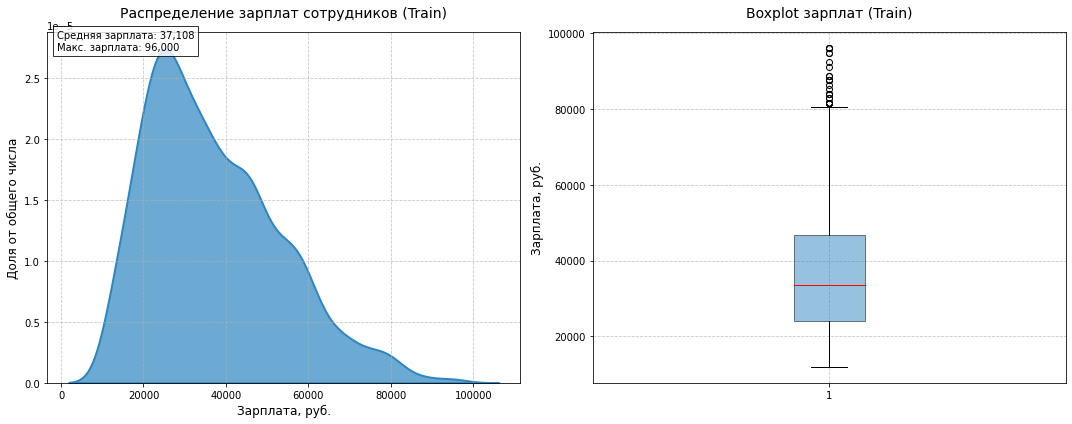

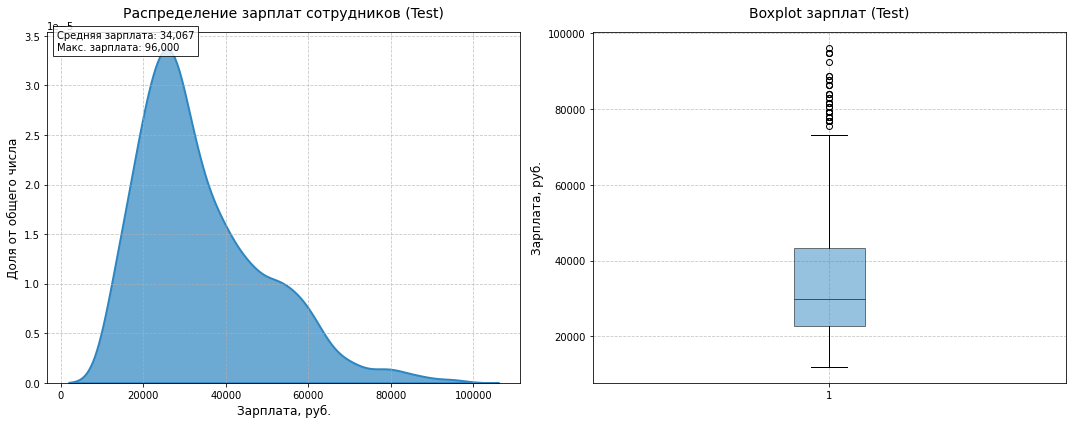

In [95]:
boxplot_func(train, test)

### Исследовательский анализ данных

[Функция histogramm_func](#histogramm_func)

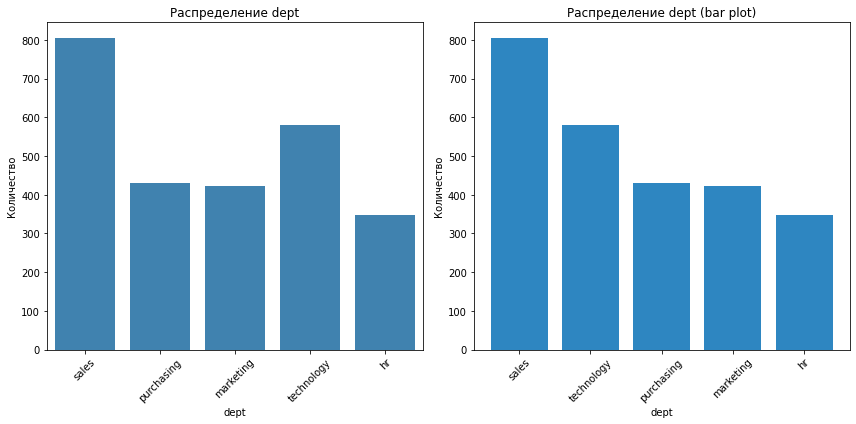

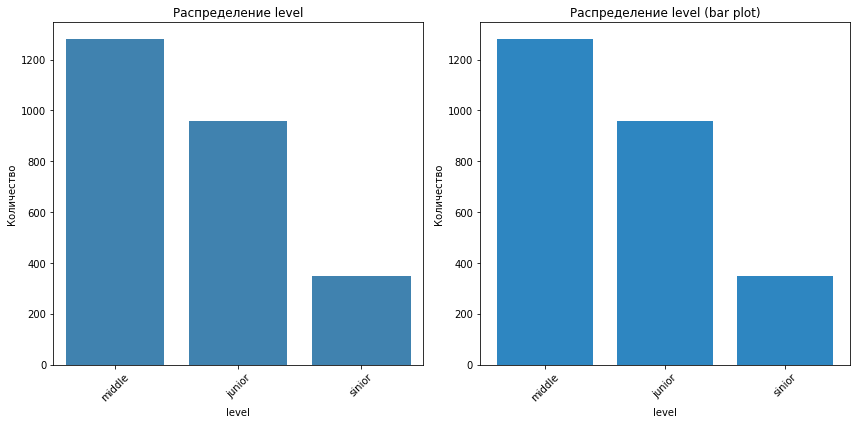

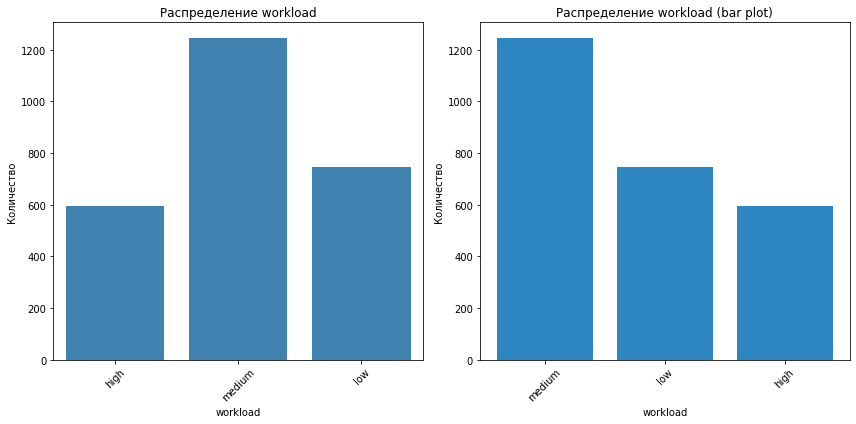

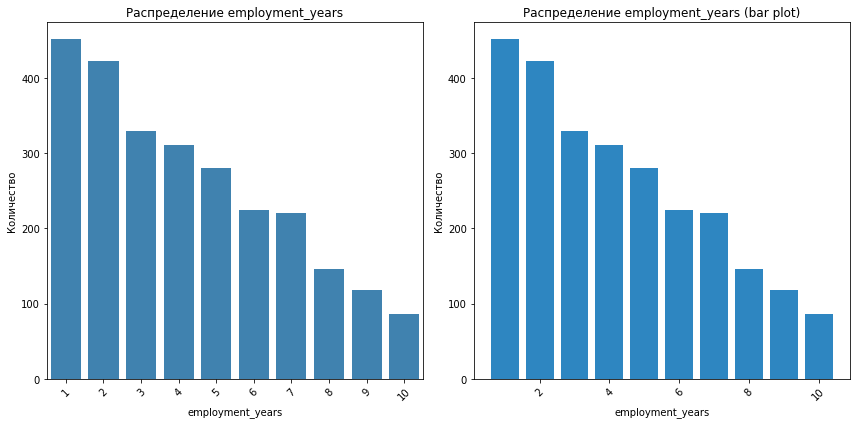

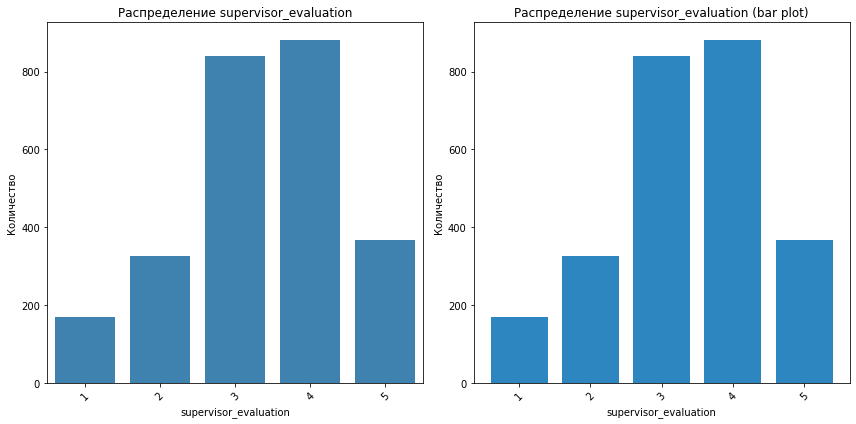

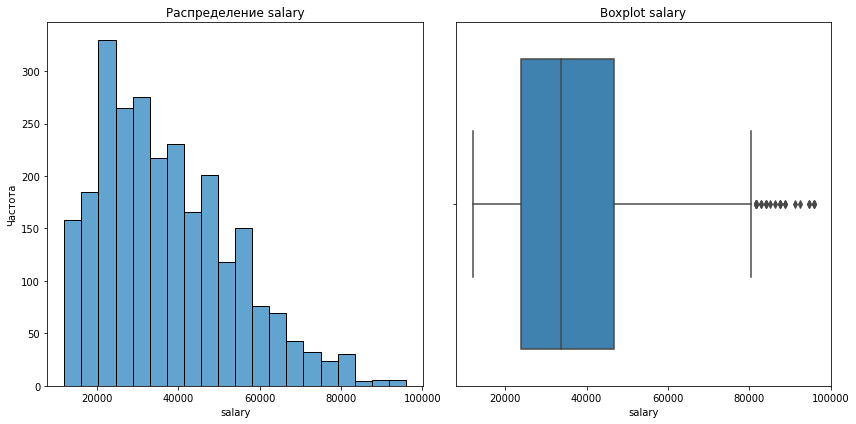

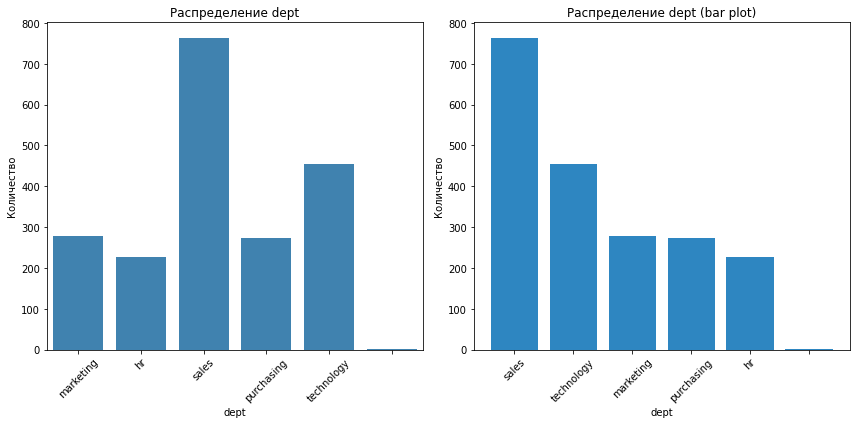

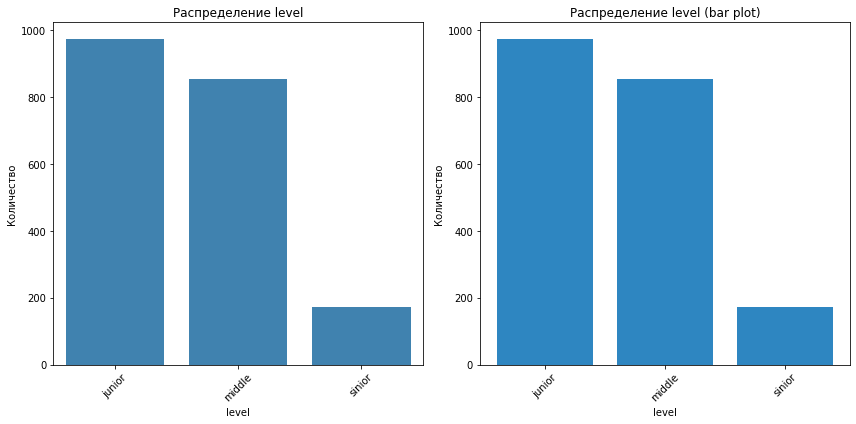

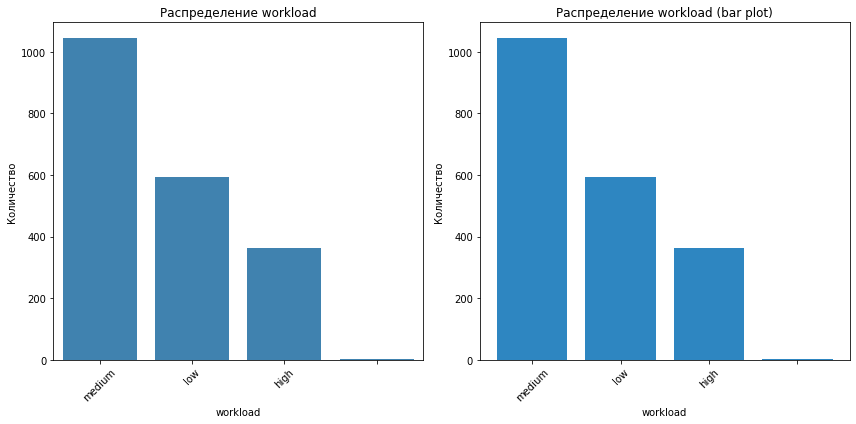

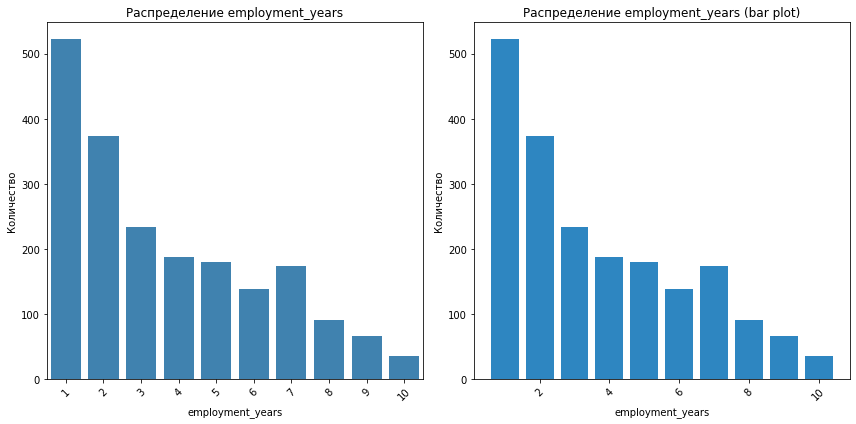

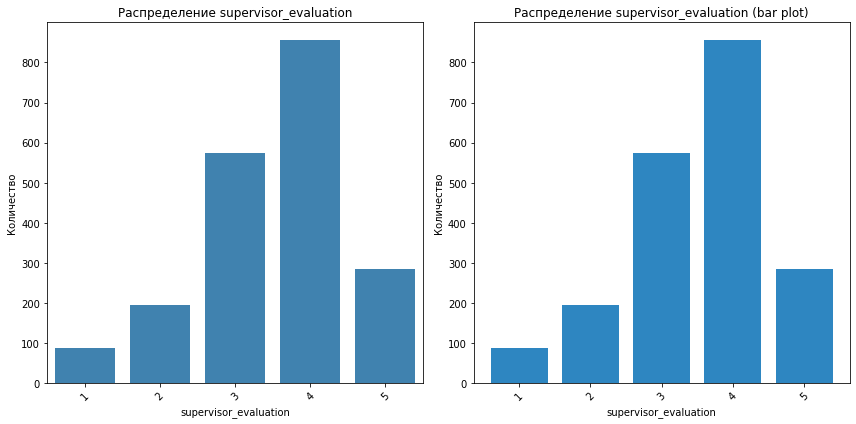

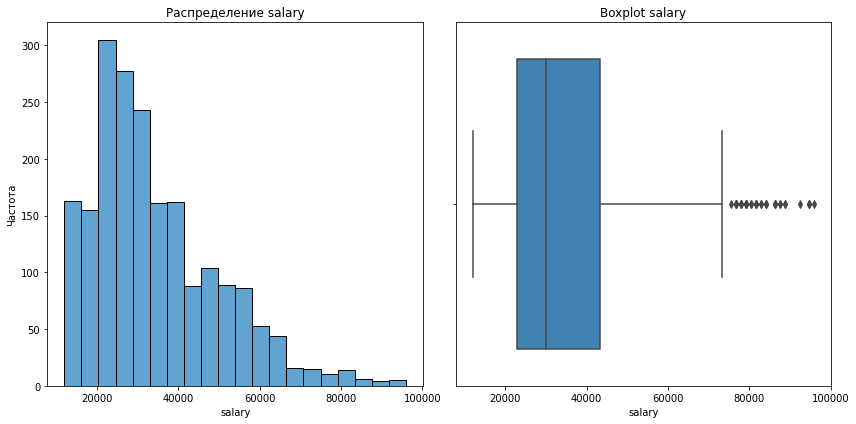

In [96]:
subset = ['dept', 'level', 'workload', 'employment_years',
           'supervisor_evaluation',
           'salary']
histogramm_func(train, test, subset)

[Функция histogramm_func](#histogramm_func)

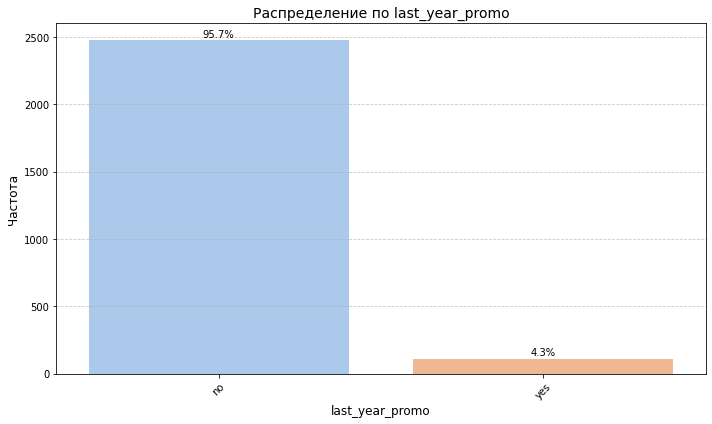

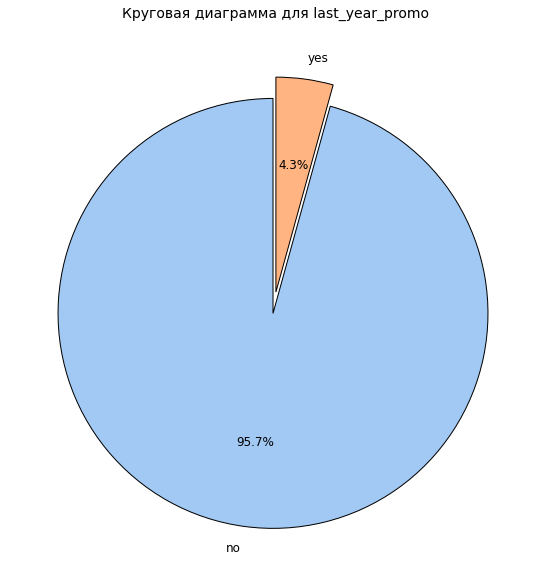

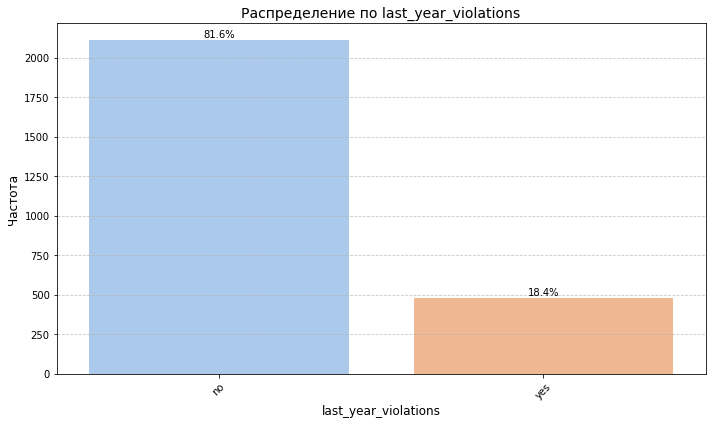

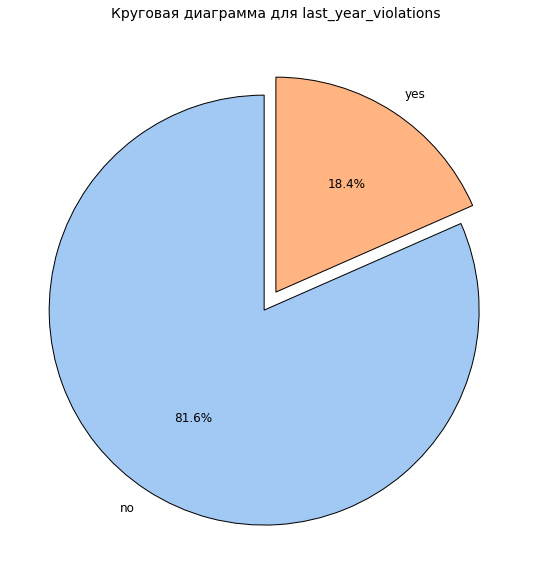

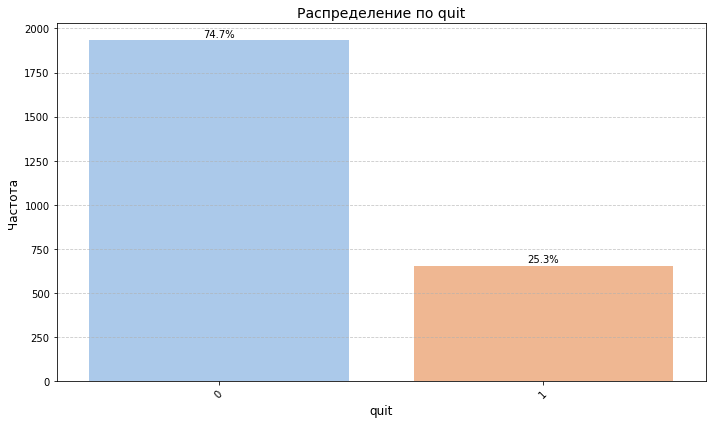

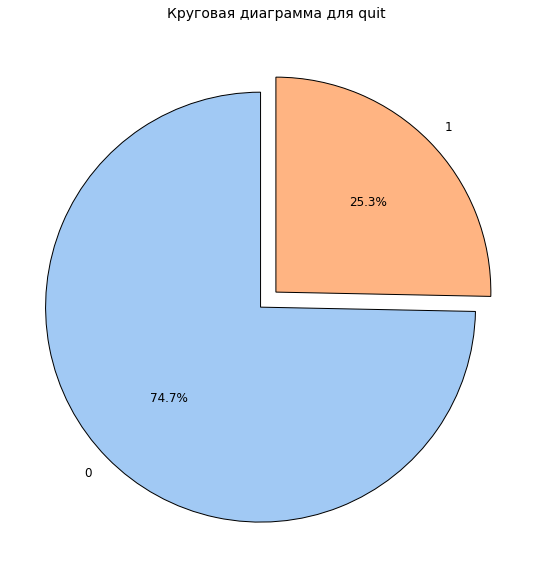

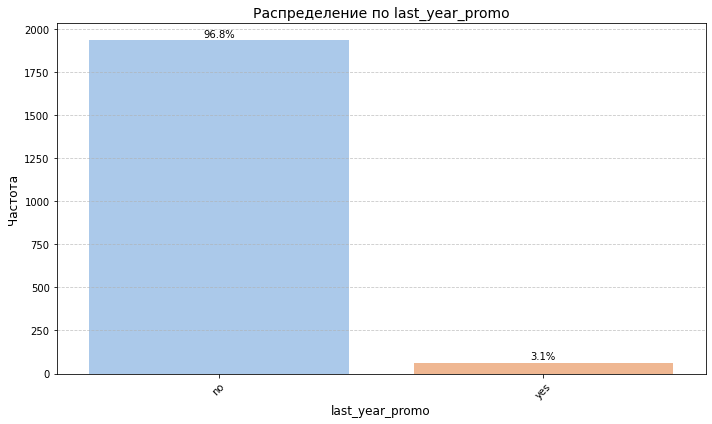

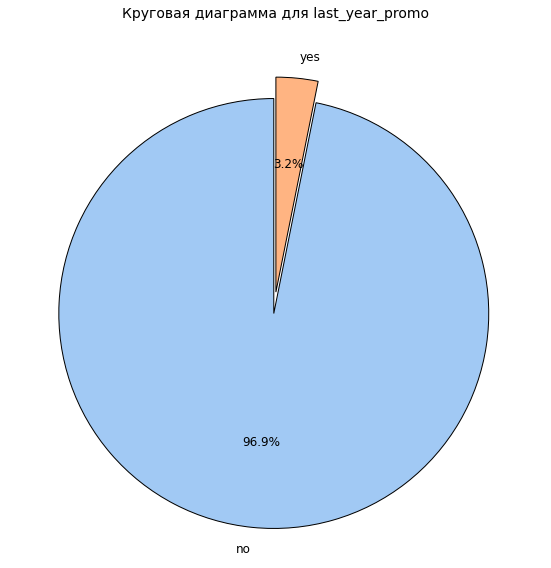

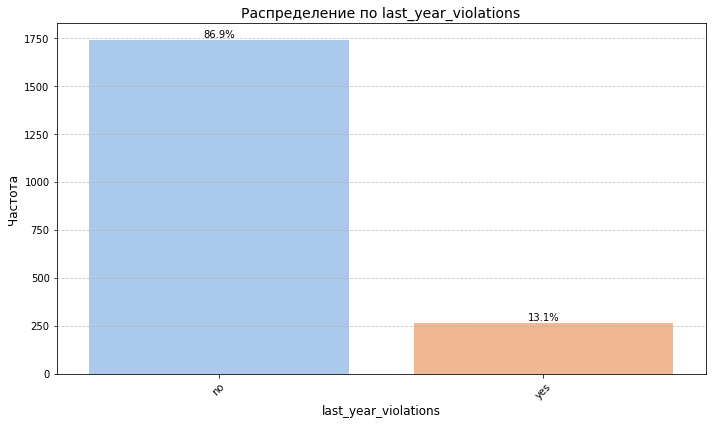

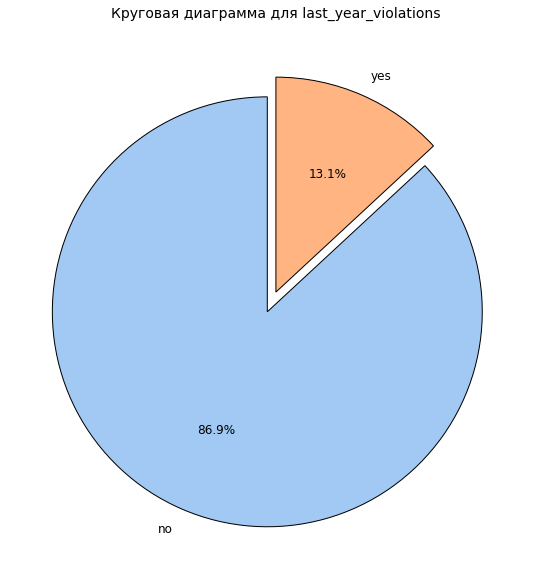

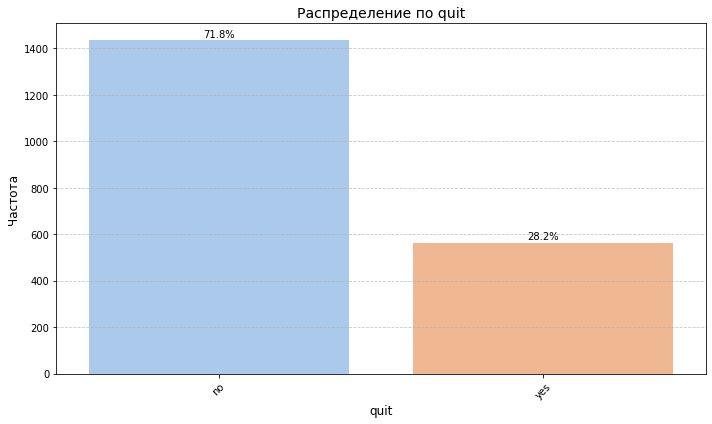

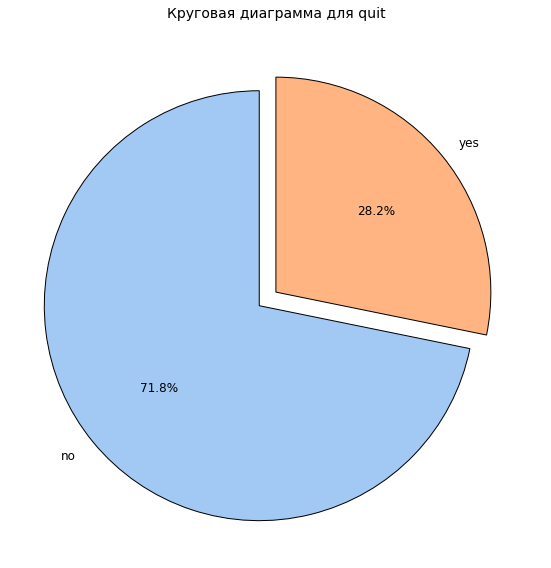

In [97]:
subset = ['last_year_promo', 'last_year_violations', 'quit']
diogramm_func(train, test, subset)

#### Корреляционный анализ данных

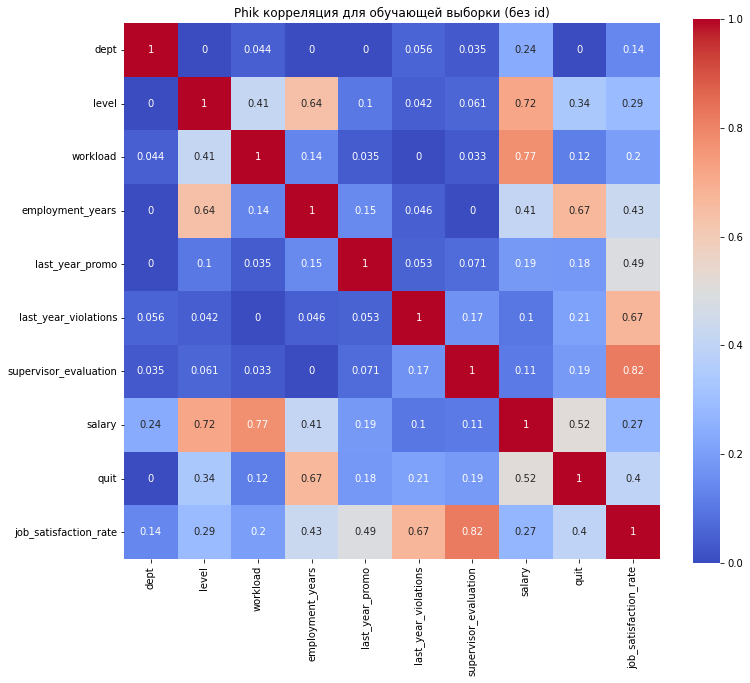

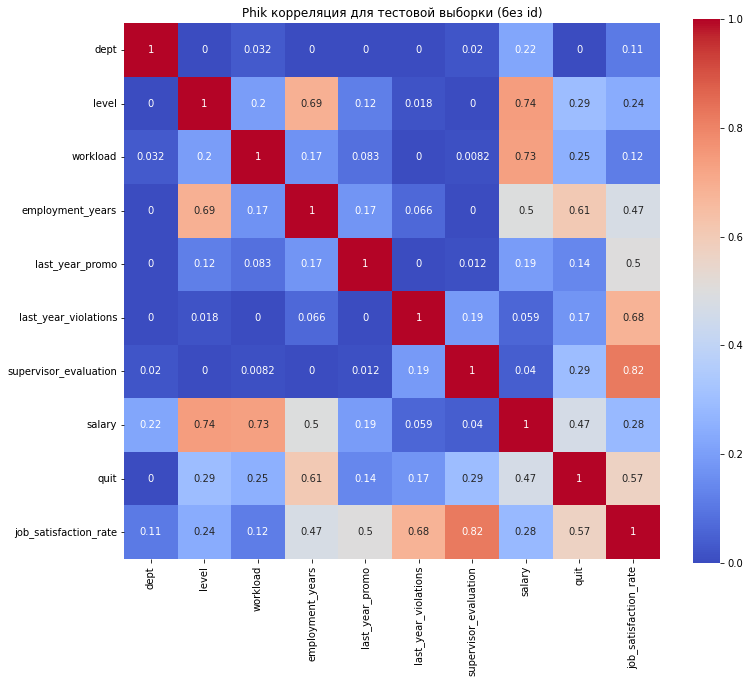

In [98]:
cols_to_use = [col for col in train.columns if col != 'id']

phik_matrix_train = train[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])
phik_matrix_test = test[cols_to_use].phik_matrix(interval_cols=["job_satisfaction_rate", "salary"])

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_train, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для обучающей выборки (без id)")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_test, annot=True, cmap="coolwarm", square=True)
plt.title("Phik корреляция для тестовой выборки (без id)")
plt.show()


### Пайплайны

In [99]:
cat_columns = ['dept', 'last_year_promo', 'last_year_violations', 'level', 'workload']

X_train = standardize_categories(X_train, cat_columns)
X_test = standardize_categories(X_test, cat_columns)


In [100]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
target_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

target_pipe = Pipeline([
    ('simpleImputer_target', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('target', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])

preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_columns),
    ('target', target_pipe, target_columns)
], remainder='drop')

final_p = Pipeline([
    ('preprocessor', preprocessor),
    ('final_imputer', SimpleImputer(strategy='mean')),
    ('models', LogisticRegression(random_state=42))
])

param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 22),
        'models__weights': ['uniform', 'distance'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 19),
        'models__min_samples_leaf': [2, 5, 10, 14],
        'models__min_samples_split': [2, 5, 10, 14],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=42, probability=True)],
        'models__C': range(1, 8),
        'models__kernel': ['rbf', 'poly'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__decision_function_shape': ['ovr', 'ovo']
    },
    {
        'models': [LogisticRegression(random_state=42, solver='saga', max_iter=45000)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__class_weight': [None, 'balanced'],
        'models__C': range(1, 8)
    }
]

print("Начинаем поиск лучшей модели через GridSearchCV...")
grid = RandomizedSearchCV(
    final_p, 
    param_distributions=param_grid, 
    n_iter=100,
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1,
    random_state=42
)
grid.fit(X_train, y_train)

best_single_model = grid.best_estimator_
print(f"Лучшая модель по GridSearchCV: {best_single_model}")
print(f"Лучший roc_auc в кросс-валидации (GridSearchCV): {grid.best_score_:.4f}")

print("\nОцениваем кастомный ансамбль через кросс-валидацию...")

custom_preprocessor = Pipeline([
    ('column_transformer', clone(preprocessor)),
    ('final_imputer', SimpleImputer(strategy='mean'))
])
custom_preprocessor.fit(X_train)
X_train_transformed = custom_preprocessor.transform(X_train)
X_test_transformed = custom_preprocessor.transform(X_test)

elasticnet_classifier = LogisticRegression(C=0.8, solver='saga')
elasticnet_classifier.fit(X_train_transformed, y_train)

gbr_conservative = GradientBoostingClassifier(learning_rate=0.005, max_depth=2, min_samples_leaf=100)
gbr_conservative.fit(X_train_transformed, y_train)

gbr_moderate = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_leaf=50)
gbr_moderate.fit(X_train_transformed, y_train)

rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train_transformed, y_train)

custom_ensemble = VotingClassifier([
    ('elasticnet', elasticnet_classifier),
    ('gbr_conservative', gbr_conservative),
    ('gbr_moderate', gbr_moderate),
    ('rf', rf)
], voting='soft')
custom_ensemble.fit(X_train_transformed, y_train)


cv_custom = cross_val_score(custom_ensemble, X_train_transformed, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
custom_cv_score = cv_custom.mean()
print(f"CV roc_auc для кастомного ансамбля: {custom_cv_score:.4f}")


if custom_cv_score > grid.best_score_:
    final_model = custom_ensemble
    final_preprocessor = custom_preprocessor  
    print("Используем кастомный ансамбль как итоговую модель.")
else:
    final_model = best_single_model
    final_preprocessor = None
    print("Используем лучшую модель из GridSearchCV как итоговую модель.")

if final_preprocessor is not None:
    X_test_final = final_preprocessor.transform(X_test)
else:
    X_test_final = X_test

test_probs = final_model.predict_proba(X_test_final)
final_roc_auc = roc_auc_score(y_test, test_probs[:, 1])
print(f"Итоговый тестовый roc_auc: {final_roc_auc:.4f}")


Начинаем поиск лучшей модели через GridSearchCV...
Лучшая модель по GridSearchCV: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('num', StandardScaler(),
                           

#### Важность признаков модели

[функция feature_importance](#feature_importance)

Получено 11 имен признаков


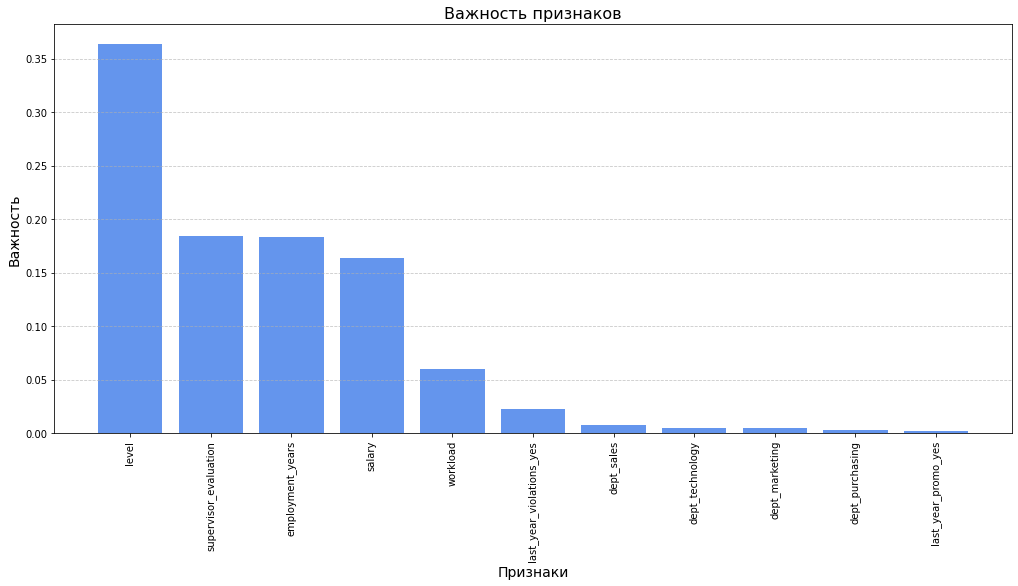


Топ-10 важных признаков:
1. level (важность: 0.3639)
2. supervisor_evaluation (важность: 0.1846)
3. employment_years (важность: 0.1837)
4. salary (важность: 0.1639)
5. workload (важность: 0.0596)
6. last_year_violations_yes (важность: 0.0228)
7. dept_sales (важность: 0.0078)
8. dept_technology (важность: 0.0051)
9. dept_marketing (важность: 0.0043)
10. dept_purchasing (важность: 0.0028)


In [101]:
feature_importance(X_train, X_test, y_train)

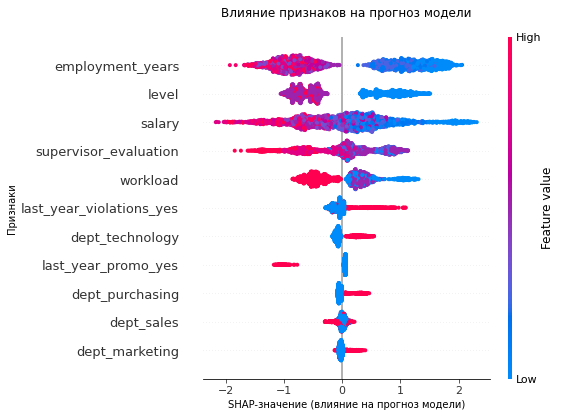

In [102]:
feature_names = get_feature_names(preprocessor)

model = GradientBoostingClassifier(
    learning_rate=0.05, 
    max_depth=5, 
    min_samples_leaf=50, 
    n_estimators=200, 
    subsample=0.6,
    random_state=42
)

model.fit(X_train_transformed, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_transformed)


plt.figure(figsize=(10, 8))


shap.summary_plot(
    shap_values, 
    X_train_transformed,
    feature_names=feature_names,
    show=False  
)

plt.title('Влияние признаков на прогноз модели', fontsize=12, pad=20)
plt.xlabel('SHAP-значение (влияние на прогноз модели)', fontsize=10)
plt.ylabel('Признаки', fontsize=10)

plt.tight_layout()

plt.show()

## ___Выводы по задаче___



<span style="font-size: 18px; font-family: Georgia;">**Анализ параметров LogisticRegression**</span>

<span style="font-size: 14px; font-family: Georgia;">**1. Сбалансированные веса классов (`class_weight='balanced'`)**</span>
- **Характеристика данных**:  
  - **Серьёзный дисбаланс классов**  
  - **Эффект доминирования** мажоритарного класса при стандартном обучении  
- **Последствия для модели**:  
  - Автоматическое увеличение веса миноритарного класса в функции потерь  
  - Снижение метрик типа Accuracy в пользу Recall/F1  

<span style="font-size: 14px; font-family: Georgia;">**2. Параметр регуляризации `C=4`**</span>
- **Особенности регуляризации**:  
  - Обратная сила регуляризации: 1/C = 0.25 (средняя интенсивность)  
  - **Сохранение информативных признаков** без агрессивного обнуления (в отличие от Lasso)  
- **Интерпретация**:  
  - Наличие умеренного шума в данных  
  - Отсутствие строгой мультиколлинеарности  
  - Оптимальный компромисс между смещением и дисперсией  



<span style="font-size: 14px; font-family: Georgia;">**Сравнение с альтернативами**</span>

| Модель                  | Почему не подошла              | Инсайт о данных            |  
|-------------------------|--------------------------------|---------------------------|
| **RandomForest**        | Дисбаланс классов | Требование explainability |  
| **SVM**                 | Высокая вычислительная сложность | Большой объём данных      |  
| **GradientBoosting**    | Чрезмерная гибкость → overfit  | Жёсткие границы классов   |  


## Портреты неудовлетворённого и увольняющегося сотрудника





<span style="font-size: 20px; font-family: Georgia;">🛠 **Факторы, наиболее важные для модели**</span>
1. **Уровень должности (`level`)**:
   - Самый сильный предсказатель увольнения (важность: 0.3639).
   - Вероятнее всего, сотрудники с более низким уровнем должности склонны увольняться чаще (т.к. на графике SHAP значения уровней сильно смещены в сторону высокого влияния, если уровень низкий).   
     
2. **Оценка руководителя (`supervisor_evaluation`)**:
   - Важна на втором месте (важность: 0.1846).
   - С низкой оценкой повышается вероятность увольнения (что логично: неудовлетворенная работа ведет к конфликтам или утрате мотивации). 

3. **Стаж работы (`employment_years`)**:
   - Третий по важности показатель (важность: 0.1837).
   - Сотрудники с меньшим стажем работы (меньше 2–3 лет) больше склонны к увольнению. Это может отражать риск текучести на ранних этапах.

4. **Зарплата (`salary`)**:
   - На четвертом месте (важность: 0.1639).
   - Сотрудники с более низкими зарплатами, как правило, чаще покидают компанию (что подтверждается SHAP: низкая зарплата вызывает рост риска увольнения).

5. **Уровень загруженности (`workload`)**:
   - Важность относительно низкая (0.0654), но наблюдается связь: высокая загруженность может усиливать стресс, увеличивая риски ухода.

6. **Нарушение трудового договора в прошлом году (`last_year_violations_yes`)**:
   - Увеличивает риск увольнения, но влияние небольшое (важность: 0.0596).
   - Сотрудники, которые нарушали правила, чаще покидают компанию — возможно, как из-за увольнений по соглашению сторон, так и из-за обострившихся отношений.

<span style="font-size: 20px; font-family: Georgia;">📊 **Корреляция с увольнением**</span>
1. Наиболее сильными факторами с отрицательной корреляцией с увольнениями являются:
   - **`level` (0.29)**: Высокий уровень должности резко снижает вероятность увольнения.
   - **`employment_years` (0.61)**: Чем дольше работает сотрудник, тем ниже вероятность ухода.
   - **`supervisor_evaluation` (0.29)** и **`salary` (0.47)** также надежно предсказывают снижение вероятности увольнения. Мотивация и удовлетворенность здесь напрямую связаны с оценкой и материальными стимулами.

2. **`workload` (0.25)** демонстрирует слабую обратную связь: нагрузка влияет на увольнения, но не столь значительно, как другие факторы.

<span style="font-size: 20px; font-family: Georgia;">🖼 **Портрет типичного увольняющегося сотрудника**</span>
На основе модели и анализа данных можно выделить ключевые характеристики типичного сотрудника, склонного к увольнению:
1. **Низкий уровень должности** (например, младший специалист или аналогичная позиция).
2. **Невысокая оценка от руководителя** (низкая производительность, низкая поддержка со стороны руководства).
3. **Небольшой опыт в компании** (до 2–3 лет).
4. **Низкая зарплата**, что, скорее всего, не мотивирует работать в долгосрочной перспективе.
5. **Может проявляться высокая или низкая нагрузка** (стресс из-за переполненного графика или скука от недостатка сложных задач).

<span style="font-size: 20px; font-family: Georgia;">🔍 **Рекомендации для управления рисками увольнений**</span>
1. **Повысьте поддержку сотрудников с низкими уровнями должности**:
   - Сотруднику важно понимать есть ли у него шансы на карьерный или зарплатный рост

2. **Обращайте внимание на сотрудников с низким стажем**:
   - Первые годы работы особенно важны: включайте mentorship-программы для новичков.
   - Снизьте уровень рутинных задач. 

3. **Обеспечьте объективность и прозрачность оценки производительности**:
   - Убедитесь, что оценки от руководителей точно выражают вклад сотрудников.
